In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import statsmodels.api as sm
from sklearn import metrics, linear_model
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro
import itertools
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
import missingno as msno

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Importing cleaned dataset

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0          53          91        72.0   
1                  0          63         112        87.5   
2                  0          80          90        85.0   
3                  0          56          97        76.5   
4                  0          86         143       114.5   

                               company_txt job_state  same_state  age  \
0                      Tecolote Research\n        NM           0   47   
1  University of Maryland Medical System\n        MD           0   36   
2                                KnowBe4\n        FL           1   10   
3                                   PNNL\n        WA           1   55   
4                     Affinity Solutions\n        NY           1   22   

   python_yn  R_yn  spark  aws  excel  
0          1     0      0    0      1  
1          1     0      0    0      0  
2          1     0      1    0      1  
3          1     0      0    0      0  
4          1     0      0    0      1

In [3]:
# df.Sector.value_counts()
df.sort_values(by=['avg_salary'], ascending=False)[['company_txt', 'avg_salary']]

company_txt  avg_salary
354                         Liberty Mutual Insurance\n       254.0
528                         Liberty Mutual Insurance\n       254.0
708                         Liberty Mutual Insurance\n       254.0
103                                           Gallup\n       237.5
429                                     Sage Intacct\n       232.5
176                                  CA-One Tech Cloud       225.0
266                                  CA-One Tech Cloud       225.0
613                                     Grand Rounds\n       221.5
195                                    Credit Sesame\n       205.0
330                                    Credit Sesame\n       205.0
476                                    Credit Sesame\n       205.0
616                         Liberty Mutual Insurance\n       194.5
410                         Liberty Mutual Insurance\n       194.5
681                          The Climate Corporation\n       194.0
507                          The Climate Corporation\n       194.0
473                                        Visa Inc.\n       184.5
46                                         Visa Inc.\n       184.5
193                                           Tapjoy\n       181.0
328                                           Tapjoy\n       181.0
471                                           Tapjoy\n       181.0
585                                          Zest AI\n       180.0
377                                          Zest AI\n       180.0
71                                          Grainger\n       179.5
446                         Samsung Research America\n       177.0
91                               Nektar Therapeutics\n       174.0
619                                             DTCC\n       173.0
494                                 Northrop Grumman\n       173.0
667                                 Northrop Grumman\n       173.0
608                                           Pfizer\n       172.0
496                                        Two Sigma\n       172.0
226                                  Western Digital\n       171.5
159                                  Western Digital\n       171.5
283                                 CK-12 Foundation\n       169.0
220                                        Genentech\n       169.0
155                                        Genentech\n       169.0
133                          BioMarin Pharmaceutical\n       168.0
549                                        Confluent\n       168.0
637                Mitsubishi Electric Research Labs\n       167.5
375                                           Pfizer\n       167.5
565                                           Pfizer\n       167.5
474                                   Quartet Health\n       165.0
314                                         Samba TV\n       164.5
440                                         Samba TV\n       164.5
219                                       MassMutual\n       164.0
154                                       MassMutual\n       164.0
10                                              Wish\n       163.5
243                                        Genentech\n       163.0
298                                         Autodesk\n       162.5
395                                        Glassdoor\n       162.0
698                                            Adobe\n       162.0
600                                        Glassdoor\n       162.0
518                                            Adobe\n       162.0
178                           Takeda Pharmaceuticals\n       161.5
627                                         TRANZACT\n       161.5
270                           Takeda Pharmaceuticals\n       161.5
416                                         TRANZACT\n       161.5
109                                       Demandbase\n       157.0
256                                     Numeric, LLC\n       155.0
373                                     BPA Services\n       155.0
45                     

In [4]:
# df.Industry.value_counts()

In [5]:
print(f"Job Salary cleaned dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Job Salary cleaned dataset has 742 rows and 28 columns.


In [6]:
def title_simp(title):
    '''Makes the given below set of jobs as title other that these will be nil which can later changed'''
    
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle' #Machine Learning Engineer
    elif 'manager' in title.lower():
        return 'manager' 
    elif 'director' in title.lower():
        return 'director'
    elif 'scientist' in title.lower():
        return 'scientist'
    else:
        return 'others'

In [7]:
def seniority(title):
    '''Considers only senior and junior if any other then returns NaN can be changed later'''
    
    seniors = ['senior', 'sr', 'lead', 'principal']
    
    for senior in seniors:
        if senior in title.lower():
            return 'sr'
    if 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    elif 'vp' in title.lower():
        return 'vp'
    else:
        return 'jr'

In [8]:
df1 = df.copy()
df1['job_simp'] = df1['Job Title'].apply(title_simp)
df1['seniority_lvl'] = df1['Job Title'].apply(seniority)

df1.job_simp.value_counts()

data scientist    279
scientist         143
data engineer     119
analyst           102
others             41
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [9]:
df1.seniority_lvl.value_counts()

jr    520
sr    220
vp      2
Name: seniority_lvl, dtype: int64

In [10]:
# tab = df1[['Job Title', 'job_simp', 'seniority_lvl', 'avg_salary']]
# tab[(tab.job_simp=="na") |(tab.seniority_lvl=="na")]

In [11]:
# Getting cities from the location
df1['city'] = df1['Location'].apply(lambda x:x.split(",")[0])

In [12]:
#getting company names and removing rating
df1['company_name'] = df1['Company Name'].apply(lambda x:x.split("\n")[0].strip("\n"))

In [13]:
# while investigating we found one record with rating, company size, and lots of other values as -1 probably this is a bad record and may effect the dataset so we are removing it for now

df1['Size'].value_counts()
display(df1[df1.Size=="-1"])
df2 = df1[df1.Size!="-1"]

Job Title  \
581  Scientist – Cancer Discovery, Molecular Assay   

                          Salary Estimate  \
581  Employer Provided Salary:$100K-$135K   

                                       Job Description  Rating  \
581  Scientist – Cancer Discovery, Molecular Assay\...    -1.0   

                Company Name       Location Headquarters Size  Founded  \
581  Monte Rosa Therapeutics  Cambridge, MA           -1   -1       -1   

    Type of ownership Industry Sector Revenue Competitors  hourly  \
581                -1       -1     -1      -1          -1       0   

     employer_provided  min_salary  max_salary  avg_salary  \
581                  1         100         135       117.5   

                 company_txt job_state  same_state  age  python_yn  R_yn  \
581  Monte Rosa Therapeutics        MA           0   -1          0     0   

     spark  aws  excel   job_simp seniority_lvl       city  \
581      0    0      1  scientist            jr  Cambridge   

                company_name  
581  Monte Rosa Therapeutics

In [14]:
# Since type of ownership has only 10 unique values so we are keepind it
df2['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
Name: Type of ownership, dtype: int64

In [15]:
df2['Revenue'].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [16]:
# We noticed lots of competitors with value as "-1" hence replacing it with NA
df3 = df2.replace("-1", "NA")


In [17]:
df3.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 NA       0   
1                                                 NA       0   
2                                                 NA       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0          53          91        72.0   
1                  0          63         112        87.5   
2                  0          80          90        85.0   
3                  0          56          97        76.5   
4                  0          86         143       114.5   

                               company_txt job_state  same_state  age  \
0                      Tecolote Research\n        NM           0   47   
1  University of Maryland Medical System\n        MD           0   36   
2                                KnowBe4\n        FL           1   10   
3                                   PNNL\n        WA           1   55   
4                     Affinity Solutions\n        NY           1   22   

   python_yn  R_yn  spark  aws  excel        job_simp seniority_lvl  \
0          1     0      0    0      1  data scientist            jr   
1          1     0      0    0      0  data scientist            jr   
2          1     0      1    0      1  data scientist            jr   
3          1     0      0    0      0  data scientist            jr   
4          1     0      0    0      1  data scientist            jr   

          city                           company_name  
0  Albuquerque                      Tecolote Research  
1    Linthicum  University of Maryland Medical Syst

Since job description has lots of data and unique values for simplifying it we are currently using just the length of the given description instead. Because for linear regression model we need numerical values. For us to gather important information from this feature we will need advanced techniques of ML which is out of the scope of this project and can be done for next steps.

In [18]:
# Since job description has lots of data and unique values for simplifying it we are currently u
df3.head()
columns_to_remove = ["Salary Estimate", "Job Description", "Company Name", "Location", "Headquarters", "Founded", "company_txt", "Job Title", "Industry"]
df4 = df3.drop(columns=columns_to_remove, axis=1)
df4.head()

Rating                    Size   Type of ownership  \
0     3.8   501 to 1000 employees   Company - Private   
1     3.4        10000+ employees  Other Organization   
2     4.8   501 to 1000 employees   Company - Private   
3     3.8  1001 to 5000 employees          Government   
4     2.9     51 to 200 employees   Company - Private   

                         Sector                           Revenue  \
0           Aerospace & Defense         $50 to $100 million (USD)   
1                   Health Care            $2 to $5 billion (USD)   
2             Business Services        $100 to $500 million (USD)   
3  Oil, Gas, Energy & Utilities  $500 million to $1 billion (USD)   
4             Business Services          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 NA       0   
1                                                 NA       0   
2                                                 NA       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary job_state  \
0                  0          53          91        72.0        NM   
1                  0          63         112        87.5        MD   
2                  0          80          90        85.0        FL   
3                  0          56          97        76.5        WA   
4                  0          86         143       114.5        NY   

   same_state  age  python_yn  R_yn  spark  aws  excel        job_simp  \
0           0   47          1     0      0    0      1  data scientist   
1           0   36          1     0      0    0      0  data scientist   
2           1   10          1     0      1    0      1  data scientist   
3           1   55          1     0      0    0      0  data scientist   
4           1   22          1     0      0    0      1  data scientist   

  seniority_lvl         city                           company_name  
0            jr  Albuquerque                      Tecolote Research  
1            jr    Linthicum  University of Maryland Medical System  
2            jr   Clearwater                                KnowBe4  
3            jr     Richland                                   PNNL  
4            jr     New York                     Affinity Solutions

In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 741
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             741 non-null    float64
 1   Size               741 non-null    object 
 2   Type of ownership  741 non-null    object 
 3   Sector             741 non-null    object 
 4   Revenue            741 non-null    object 
 5   Competitors        741 non-null    object 
 6   hourly             741 non-null    int64  
 7   employer_provided  741 non-null    int64  
 8   min_salary         741 non-null    int64  
 9   max_salary         741 non-null    int64  
 10  avg_salary         741 non-null    float64
 11  job_state          741 non-null    object 
 12  same_state         741 non-null    int64  
 13  age                741 non-null    int64  
 14  python_yn          741 non-null    int64  
 15  R_yn               741 non-null    int64  
 16  spark              741 non

After processing the dataset features we have 13 numeric features such as 'Rating' 'hourly' 'employer_provided' 'min_salary' 'max_salary'
 'avg_salary' 'same_state' 'age' 'python_yn' 'R_yn' 'spark' 'aws' 'excel'

In [20]:
df_numerics = df4.select_dtypes(include=np.number)
print(f"There are total {df_numerics.shape[1]} features with numeric datatypes as follows: \n {df_numerics.columns.values}")

There are total 13 features with numeric datatypes as follows: 
 ['Rating' 'hourly' 'employer_provided' 'min_salary' 'max_salary'
 'avg_salary' 'same_state' 'age' 'python_yn' 'R_yn' 'spark' 'aws' 'excel']


After processing the dataset features we have 11 categorical features such as 'Size' 'Type of ownership' 'Industry' 'Sector' 'Revenue' 'Competitors'
 'job_state' 'job_simp' 'seniority_lvl' 'city' 'company_name'

In [21]:
df_objects = df4.select_dtypes(include="object")
print(f"There are total {df_objects.shape[1]} features with object datatypes as follows: \n {df_objects.columns.values}")

There are total 10 features with object datatypes as follows: 
 ['Size' 'Type of ownership' 'Sector' 'Revenue' 'Competitors' 'job_state'
 'job_simp' 'seniority_lvl' 'city' 'company_name']


In [22]:
# getting quick summary statistics for numeric features
df4.describe()

Rating      hourly  employer_provided  min_salary  max_salary  \
count  741.000000  741.000000         741.000000  741.000000   741.00000   
mean     3.625101    0.032389           0.021592   74.033738   127.17274   
std      0.783541    0.177150           0.145447   31.876539    46.93981   
min     -1.000000    0.000000           0.000000   10.000000    16.00000   
25%      3.300000    0.000000           0.000000   52.000000    96.00000   
50%      3.700000    0.000000           0.000000   69.000000   124.00000   
75%      4.000000    0.000000           0.000000   91.000000   155.00000   
max      5.000000    1.000000           1.000000  202.000000   306.00000   

       avg_salary  same_state         age   python_yn        R_yn       spark  \
count  741.000000  741.000000  741.000000  741.000000  741.000000  741.000000   
mean   100.603239    0.558704   46.655870    0.529015    0.002699    0.225371   
std     38.877238    0.496877   53.786656    0.499495    0.051917    0.418109   
min     13.500000    0.000000   -1.000000    0.000000    0.000000    0.000000   
25%     73.500000    0.000000   11.000000    0.000000    0.000000    0.000000   
50%     97.500000    1.000000   24.000000    1.000000    0.000000    0.000000   
75%    122.500000    1.000000   59.000000    1.000000    0.000000    0.000000   
max    254.000000    1.000000  276.000000    1.000000    1.000000    1.000000   

              aws       excel  
count  741.000000  741.000000  
mean     0.237517    0.522267  
std      0.425849    0.499841  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

[Text(0.5, 1.0, 'Histogram for Average Salary')]

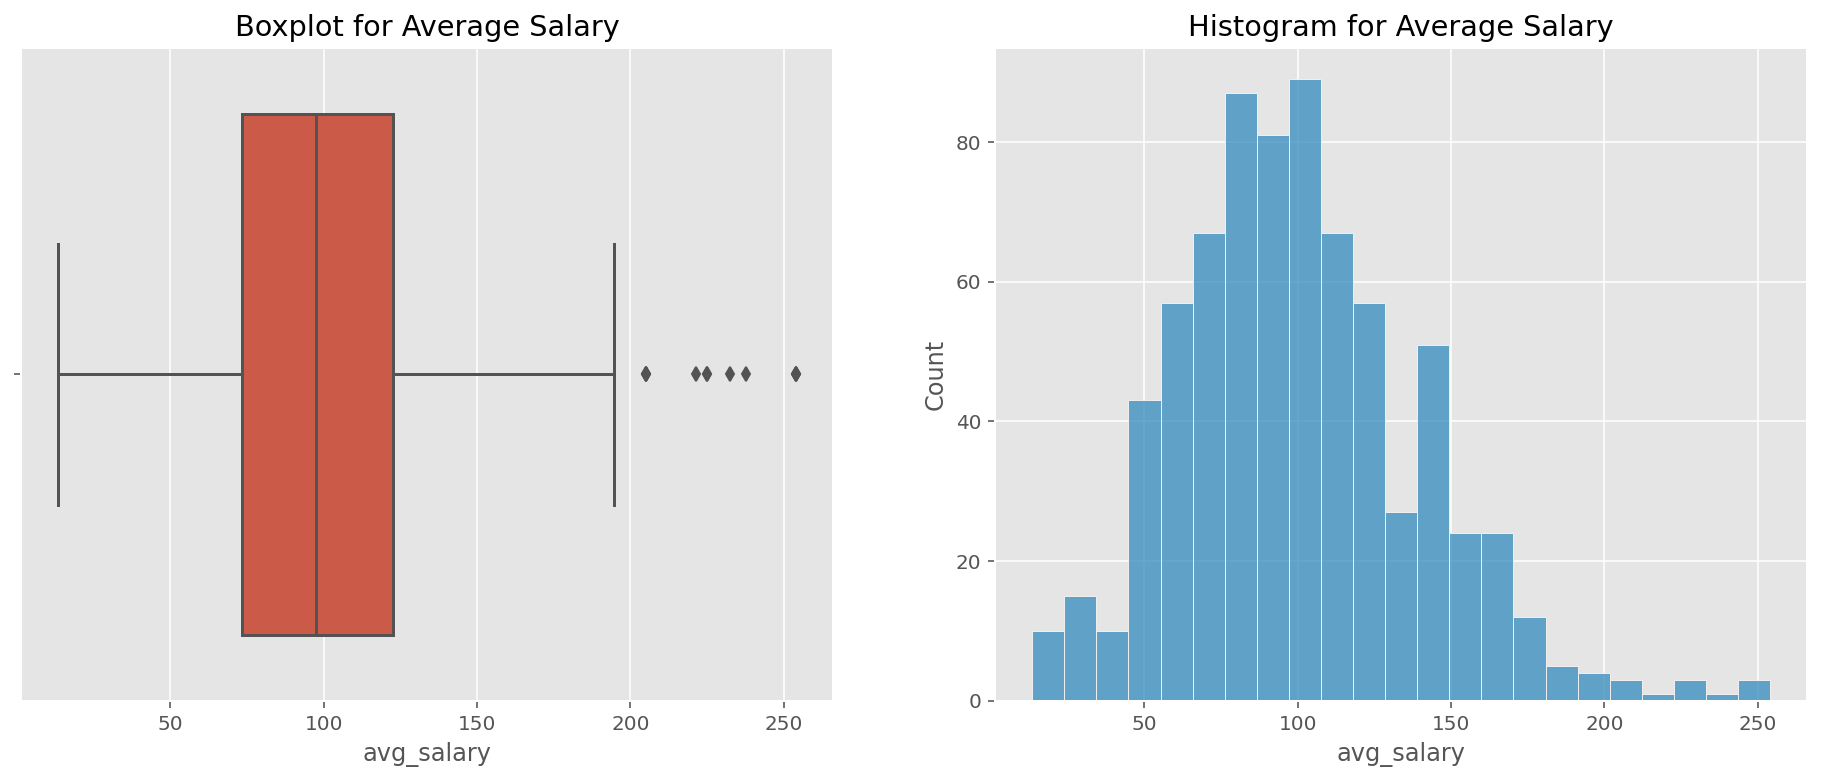

In [23]:
# Plotting distribution of target side by side
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.boxplot(df4.avg_salary, ax=axs[0]).set(title="Boxplot for Average Salary")
sns.histplot(df4.avg_salary, ax=axs[1]).set(title="Histogram for Average Salary")

If we look at the graph above we can see the average salary which is the target has few outliers. Although the median is 100 we can find few datapoints which are between 200-250 as outliers making our distribution right skewed.

## Dealing with Missing Values

Since in previous module while cleaning the dataset we removed all missing values hence no feature has null or missing values.


In [24]:
# Lets check if any columns have missing values
df_missing = df[df.columns[df.isnull().any()].tolist()]
print(f"There are total {df_missing.shape[1]} features with missing values as follows: \n {df_missing.columns.values}")

There are total 0 features with missing values as follows: 
 []


# Dealing with Categorical Features

In our dataset we have 14 categorical features, if we remove those features we may loose lots of valuable information hence we are instead converting the categorical features to numberical by creating dummy varibales.

We have various categorical features we can create dummy variables for these features so we can benefit from the information we have there when trying to build the models.

We were having 14 categorical features and total 28 features in the cleaned dataset, however after creating dummy varibales we can see now we have 2526 columns.

In [25]:
# creating dummy variables for categorical features
df5 = pd.get_dummies(df4)

# The shape of new dataset
print(f"There are total {df5.shape[0]} rows and {df5.shape[1]} columns in the new dataset.")

df5.head()

There are total 741 rows and 783 columns in the new dataset.


Rating  hourly  employer_provided  min_salary  max_salary  avg_salary  \
0     3.8       0                  0          53          91        72.0   
1     3.4       0                  0          63         112        87.5   
2     4.8       0                  0          80          90        85.0   
3     3.8       0                  0          56          97        76.5   
4     2.9       0                  0          86         143       114.5   

   same_state  age  python_yn  R_yn  spark  aws  excel  \
0           0   47          1     0      0    0      1   
1           0   36          1     0      0    0      0   
2           1   10          1     0      1    0      1   
3           1   55          1     0      0    0      0   
4           1   22          1     0      0    0      1   

   Size_1 to 50 employees  Size_10000+ employees  Size_1001 to 5000 employees  \
0                       0                      0                            0   
1                       0                      1                            0   
2                       0                      0                            0   
3                       0                      0                            1   
4                       0                      0                            0   

   Size_201 to 500 employees  Size_5001 to 10000 employees  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   Size_501 to 1000 employees  Size_51 to 200 employees  Size_Unknown  \
0                           1                         0             0   
1                           0                         0             0   
2                           1                         0             0   
3                           0                         0             0   
4                           0                         1             0   

   Type of ownership_College / University  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Type of ownership_Company - Private  Type of ownership_Company - Public  \
0                                    1                                   0   
1                                    0                                   0   
2                                    1                                   0   
3                                    0                                   0   
4                                    1                                   0   

   Type of ownership_Government  Type of ownership_Hospital  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             1                           0   
4                             0                           0   

   Type of ownership_Nonprofit Organization  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Type of ownership_Other Organization  \
0                                     0   
1                                     1   
2                                     0   
3                                     0   
4                                     0   

   Type of ownership_School / School District  \
0                                           0   
1                                           0   
2                                           0   
3                                        

In [26]:
df5.columns = [col.replace(" ","").replace("&","_") for col in df5.columns]

# Correlations

In [27]:
# plt.figure(figsize= (20,20))
# sns.heatmap(df5.corr(),vmin = -1, cmap = 'RdBu', annot = True, mask = np.triu(np.ones_like(df5.corr())))
# plt.title('Correlations', fontsize = 20, pad = 20)
# sns.despine()
# plt.show()

In [28]:
df5_corr = df5.corr()

In [29]:
df5.columns

Index(['Rating', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn',
       ...
       'company_name_Wish', 'company_name_Yesler', 'company_name_ZestAI',
       'company_name_ZimmermanAdvertising', 'company_name_comScore',
       'company_name_e-ITProfessionalsCorp.', 'company_name_goTRG',
       'company_name_h2o.ai', 'company_name_iSeatz', 'company_name_webfx.com'],
      dtype='object', length=783)

In [30]:
# Let us filter out features with strong correlation with target
# 1: is used to remove Average Salary itself
average_top20_corr = df5_corr.avg_salary.abs().sort_values(ascending=False).head(21)
print(f"Top 20 features which are having strong correlation with AverageSalary are \n {average_top20_corr[1:]}")

Top 20 features which are having strong correlation with AverageSalary are 
 max_salary                               0.990880
min_salary                               0.980117
job_simp_analyst                         0.357310
hourly                                   0.356028
seniority_lvl_jr                         0.353295
seniority_lvl_sr                         0.350582
job_simp_datascientist                   0.339264
python_yn                                0.328707
job_state_CA                             0.299702
city_SanFrancisco                        0.250968
job_simp_director                        0.242901
Typeofownership_NonprofitOrganization    0.235563
Sector_HealthCare                        0.225894
job_simp_scientist                       0.213592
city_MountainView                        0.205935
Sector_InformationTechnology             0.183537
spark                                    0.176933
Typeofownership_Hospital                 0.172421
aws                    

[Text(0.5, 1.0, 'AverageSalart Top 20 features corrplot')]

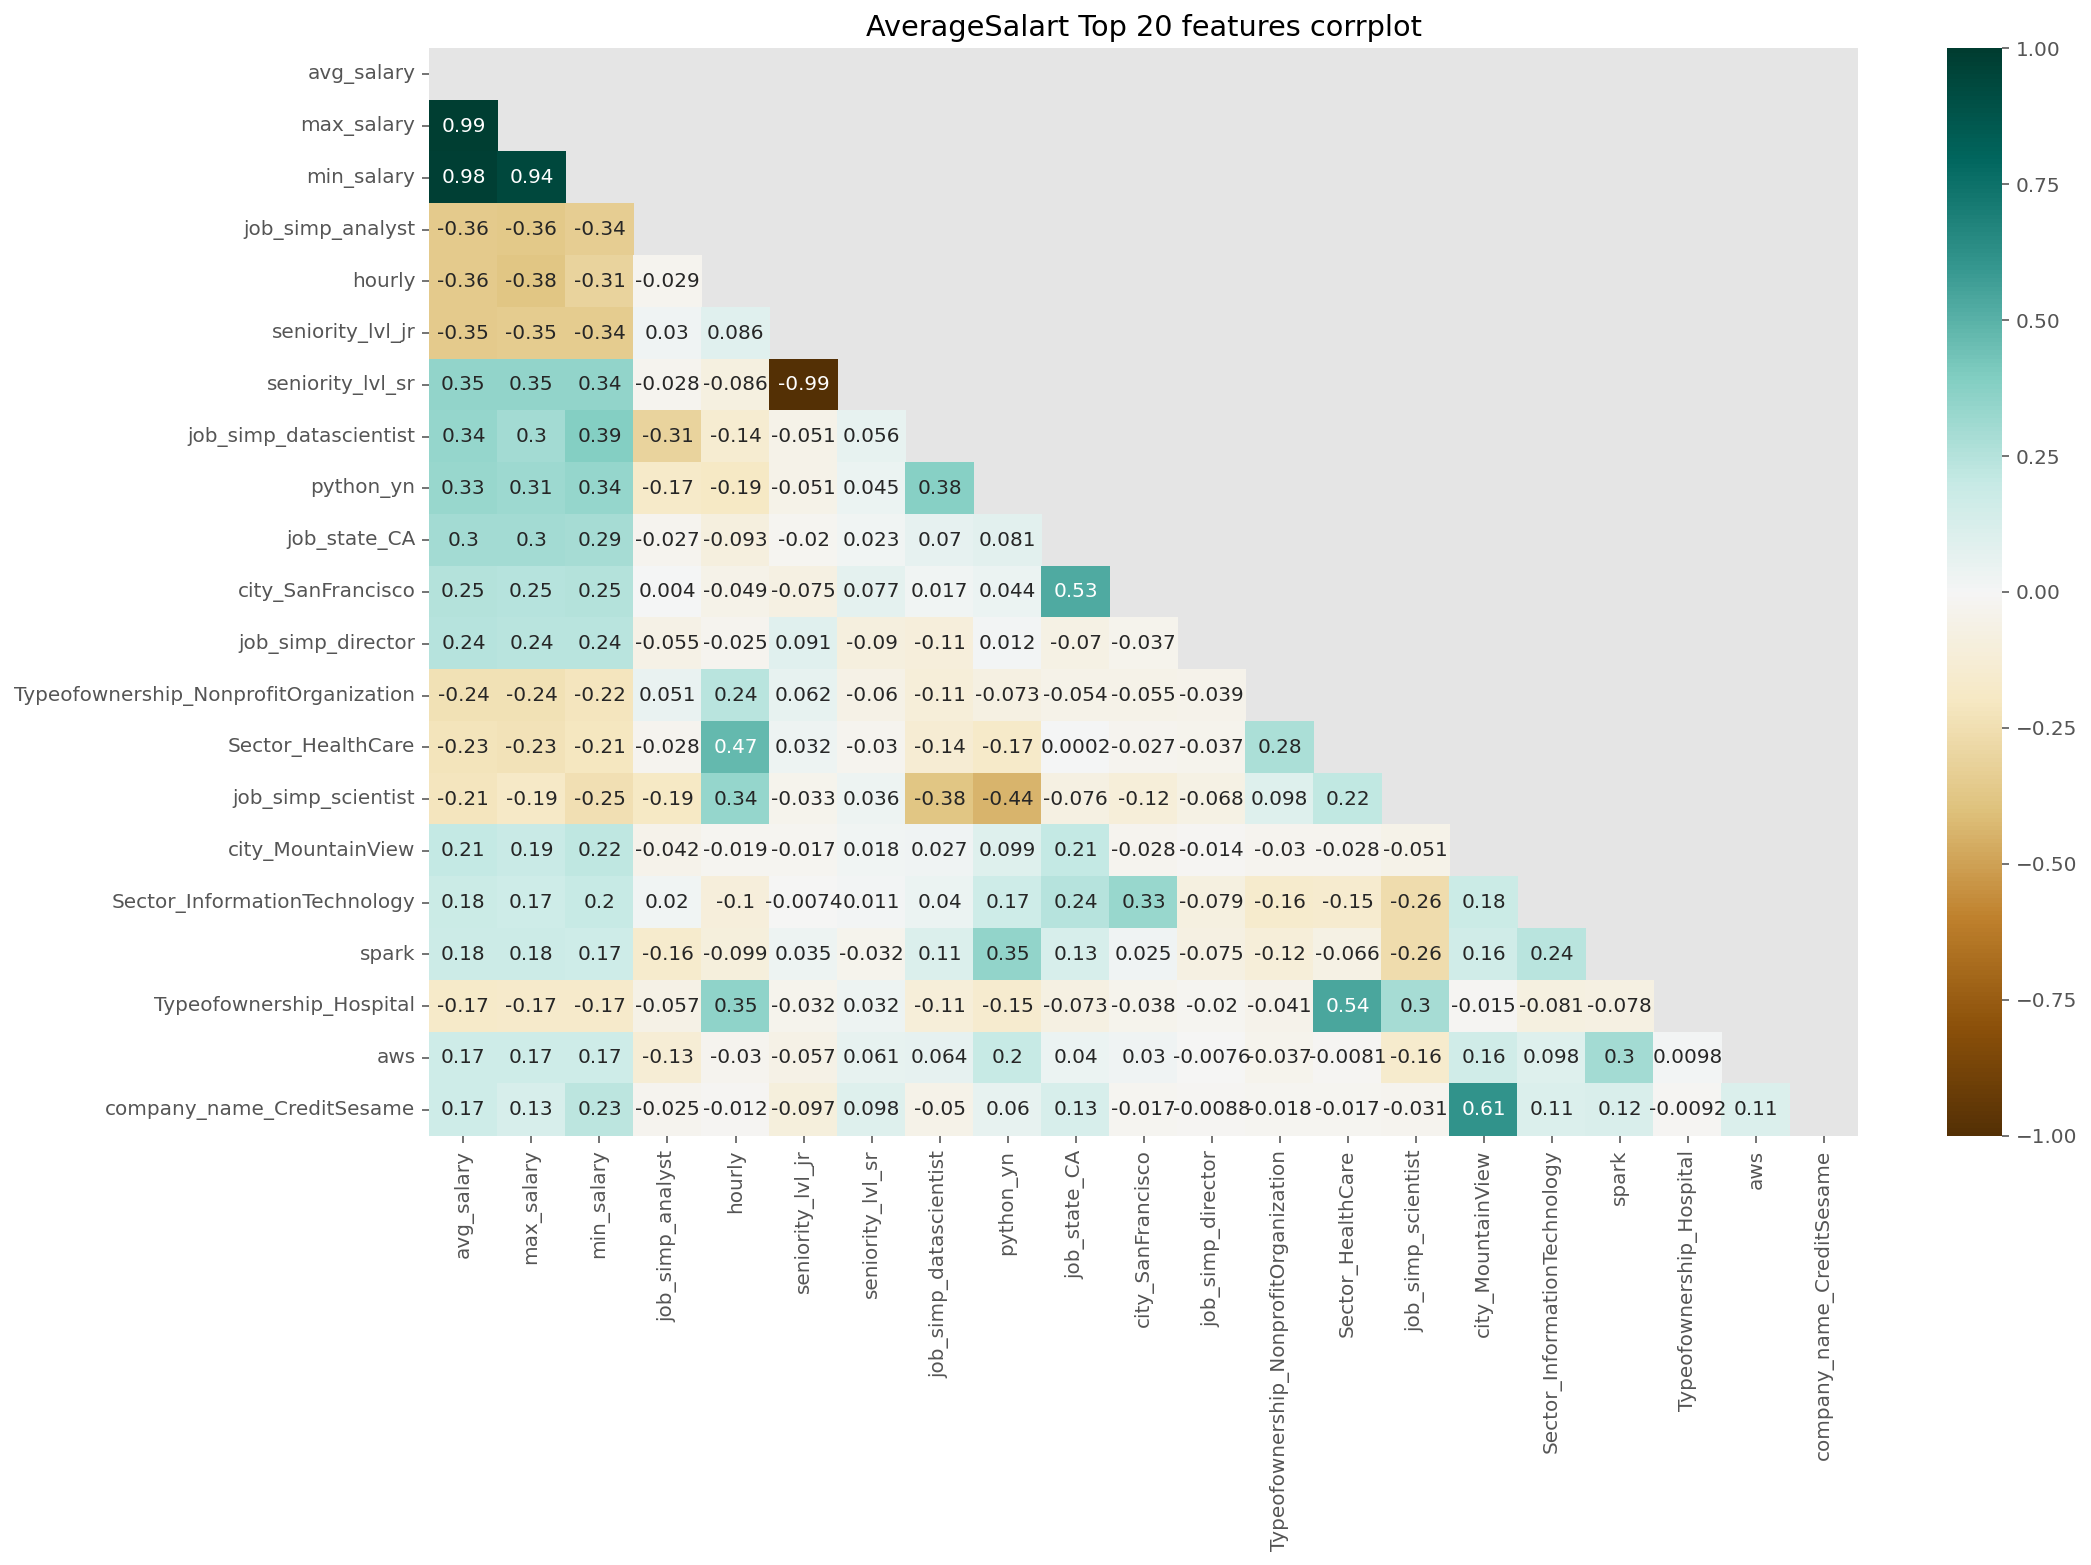

In [31]:
# Heatmap for features which have top 20 correlation with Average Salary
df5_top20_corr = df5[average_top20_corr.index].corr()


plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df5_top20_corr, dtype=np.bool))
sns.heatmap(df5_top20_corr, mask=mask, vmin=-1, vmax=1, cmap='BrBG', annot=True).set(title="AverageSalart Top 20 features corrplot")

# Creating a table for model evaluation and comparison

In [32]:
model_results = pd.DataFrame(columns=["Model #", "Model_Desc", "Feauters", "Number of features", "Tran_Rsquared", "Test_Rsquared", "Train_RMSE", "Test_RMSE"])
model_results

Empty DataFrame
Columns: [Model #, Model_Desc, Feauters, Number of features, Tran_Rsquared, Test_Rsquared, Train_RMSE, Test_RMSE]
Index: []

#  Model1: With 20 features with highest correlation with  Average Salary

In [33]:
df5_top20_corr.index

Index(['avg_salary', 'max_salary', 'min_salary', 'job_simp_analyst', 'hourly',
       'seniority_lvl_jr', 'seniority_lvl_sr', 'job_simp_datascientist',
       'python_yn', 'job_state_CA', 'city_SanFrancisco', 'job_simp_director',
       'Typeofownership_NonprofitOrganization', 'Sector_HealthCare',
       'job_simp_scientist', 'city_MountainView',
       'Sector_InformationTechnology', 'spark', 'Typeofownership_Hospital',
       'aws', 'company_name_CreditSesame'],
      dtype='object')

In [34]:
# Model 1 with top 3 correlated features with Average Salary
top_20_features = df5_top20_corr.index[1:21]
X = df5[top_20_features]
y = df5['avg_salary']
data = pd.concat([X,y], axis=1)



### Splitting the dataset for Train and  Test

In [35]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [36]:
# building first model with top3 features
formula = f"avg_salary ~ {'+'.join(top_20_features)}"
data = pd.concat([X_train,y_train], axis=1)
model1 = smf.ols(formula, data=data).fit()
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.698e+31
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:36:47   Log-Likelihood:                 15152.
No. Observations:                 518   AIC:                        -3.026e+04
Df Residuals:                     497   BIC:                        -3.017e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              7.905e-14    3.7e-14      2.136      0.033    6.35e-15    1.52e-13
max_salary                                0.5000   1.77e-16   2.83e+15      0.000       0.500       0.500
min_salary                                0.5000   2.72e-16   1.84e+15      0.000       0.500       0.500
job_simp_analyst                      -7.466e-15   7.96e-15     -0.938      0.349   -2.31e-14    8.18e-15
hourly                                 1.131e-14   1.66e-14      0.680      0.497   -2.14e-14     4.4e-14
seniority_lvl_jr                       -1.29e-13   3.55e-14     -3.638      0.000   -1.99e-13   -5.93e-14
seniority_lvl_sr                      -1.762e-13   3.55e-14     -4.967      0.000   -2.46e-13   -1.06e-13
job_simp_datascientist                 5.496e-15    6.1e-15      0.900      0.368    -6.5e-15    1.75e-14
python_yn                             -5.773e-15   5.21e-15     -1.108      0.268    -1.6e-14    4.46e-15
job_state_CA                           3.997e-15   6.92e-15      0.578      0.564    -9.6e-15    1.76e-14
city_SanFrancisco                      1.121e-14   1.09e-14      1.028      0.304   -1.02e-14    3.26e-14
job_simp_director                      2.909e-14   1.77e-14      1.645      0.101   -5.65e-15    6.38e-14
Typeofownership_NonprofitOrganization  5.031e-15   9.36e-15      0.537      0.591   -1.34e-14    2.34e-14
Sector_HealthCare                       2.72e-15   1.24e-14      0.220      0.826   -2.16e-14     2.7e-14
job_simp_scientist                    -7.244e-15    7.8e-15     -0.929      0.354   -2.26e-14    8.08e-15
city_MountainView                       5.24e-14   2.96e-14      1.767      0.078   -5.85e-15    1.11e-13
Sector_InformationTechnology          -1.121e-14   5.85e-15     -1.916      0.056   -2.27e-14    2.83e-16
spark                                  6.439e-15   5.93e-15      1.085      0.278   -5.22e-15    1.81e-14
Typeofownership_Hospital              -1.227e-14   2.08e-14     -0.590      0.556   -5.31e-14    2.86e-14
aws                                    3.497e-14   5.45e-15      6.415      0.000    2.43e-14    4.57e-14
company_name_CreditSesame             -1.776e-14   4.82e-14     -0.368      0.713   -1.12e-13     7.7e-14
==============================================================================
Omnibus:                       28.886   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.336
Skew:                          -0.466   Prob(JB):                     2.87e-09
Kurtosis:                       3.977   Cond. No.                     4.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

From the graph few most important understandings we can get are following:

RSquared values is 1 which means model built using the chosen features for predicting SalePrice contribute to 100% change in the target.
* Intercept is -1.621e-13, means when all other independent variables are 0 this 
is the value.
* With one unit change in OverallQual there is 28194.264477 increase in SalePrice
* With one unit change in GrLivArea there is 52.305191 increase in SalePrice
* With one unit change in GarageCars there is 19702.197011 increase in SalePrice

In [37]:
model1_eq_df = pd.DataFrame(model1.params).reset_index()
model1_eq_df.columns = ['params', 'coeff']
model1_eq_df

params         coeff
0                               Intercept  7.904788e-14
1                              max_salary  5.000000e-01
2                              min_salary  5.000000e-01
3                        job_simp_analyst -7.466250e-15
4                                  hourly  1.131040e-14
5                        seniority_lvl_jr -1.290079e-13
6                        seniority_lvl_sr -1.761646e-13
7                  job_simp_datascientist  5.495604e-15
8                               python_yn -5.773160e-15
9                            job_state_CA  3.996803e-15
10                      city_SanFrancisco  1.121325e-14
11                      job_simp_director  2.908784e-14
12  Typeofownership_NonprofitOrganization  5.030698e-15
13                      Sector_HealthCare  2.720046e-15
14                     job_simp_scientist -7.244205e-15
15                      city_MountainView  5.240253e-14
16           Sector_InformationTechnology -1.121325e-14
17                                  spark  6.439294e-15
18               Typeofownership_Hospital -1.226796e-14
19                                    aws  3.497203e-14
20              company_name_CreditSesame -1.776357e-14

In [38]:
model1_eq_df['str_coeff'] = model1_eq_df.apply(lambda x: "*".join(list(map(str, x))), axis=1)

model1_eq = " + ".join(model1_eq_df.str_coeff).replace("Intercept*", "")
print(f"Linear Regression Equation for Model 1 is: \n {model1_eq}")

Linear Regression Equation for Model 1 is: 
 7.904787935331115e-14 + max_salary*0.4999999999999996 + min_salary*0.500000000000001 + job_simp_analyst*-7.466249840604178e-15 + hourly*1.1310397063368782e-14 + seniority_lvl_jr*-1.290079154614432e-13 + seniority_lvl_sr*-1.7616463843239671e-13 + job_simp_datascientist*5.495603971894525e-15 + python_yn*-5.773159728050814e-15 + job_state_CA*3.9968028886505635e-15 + city_SanFrancisco*1.1213252548714081e-14 + job_simp_director*2.90878432451791e-14 + Typeofownership_NonprofitOrganization*5.0306980803327406e-15 + Sector_HealthCare*2.7200464103316335e-15 + job_simp_scientist*-7.244205235679146e-15 + city_MountainView*5.240252676230739e-14 + Sector_InformationTechnology*-1.1213252548714081e-14 + spark*6.439293542825908e-15 + Typeofownership_Hospital*-1.226796442210798e-14 + aws*3.497202527569243e-14 + company_name_CreditSesame*-1.7763568394002505e-14


In [39]:
result = {
          "Model #": "Model1",
          "Model_Desc": "Top 20 Correlated features",
          "Feauters": [model1.params.index[1:]] ,
          "Number of features": len(model1.params.index[1:]),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                  Model_Desc  \
0  Model1  Top 20 Correlated features   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0            1.0            1.0  4.792161e-14  4.981872e-14

In [40]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

# Plotting Linear Regression model 


# Assumptions

## 1. Linearity

In [41]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


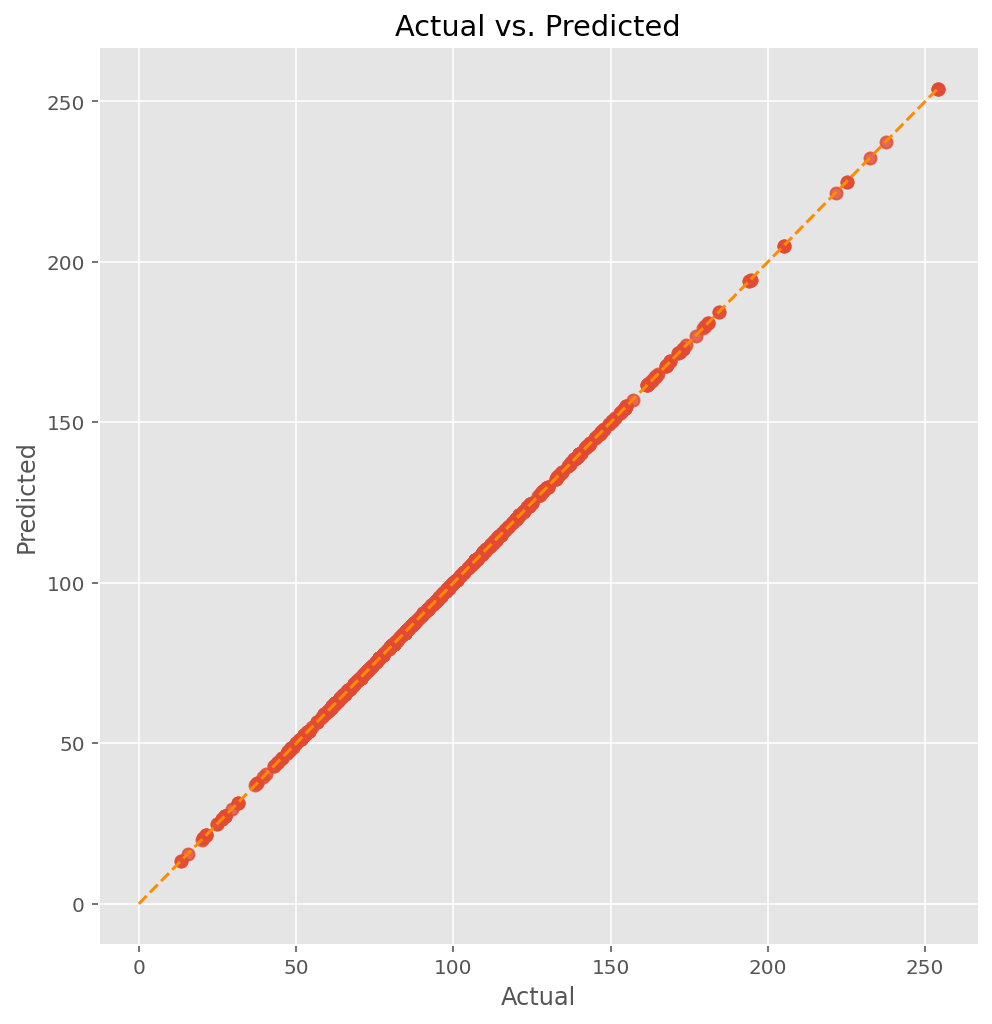

In [42]:
# let us check linearity assumption for our model
linear_assumption(model1, X, y)

Since predicted values follow the diagonal line we can say model meets linearity assumption

## II) Normality of the Error Terms

In [43]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 5.203368699653705e-29
Residuals are not normally distributed


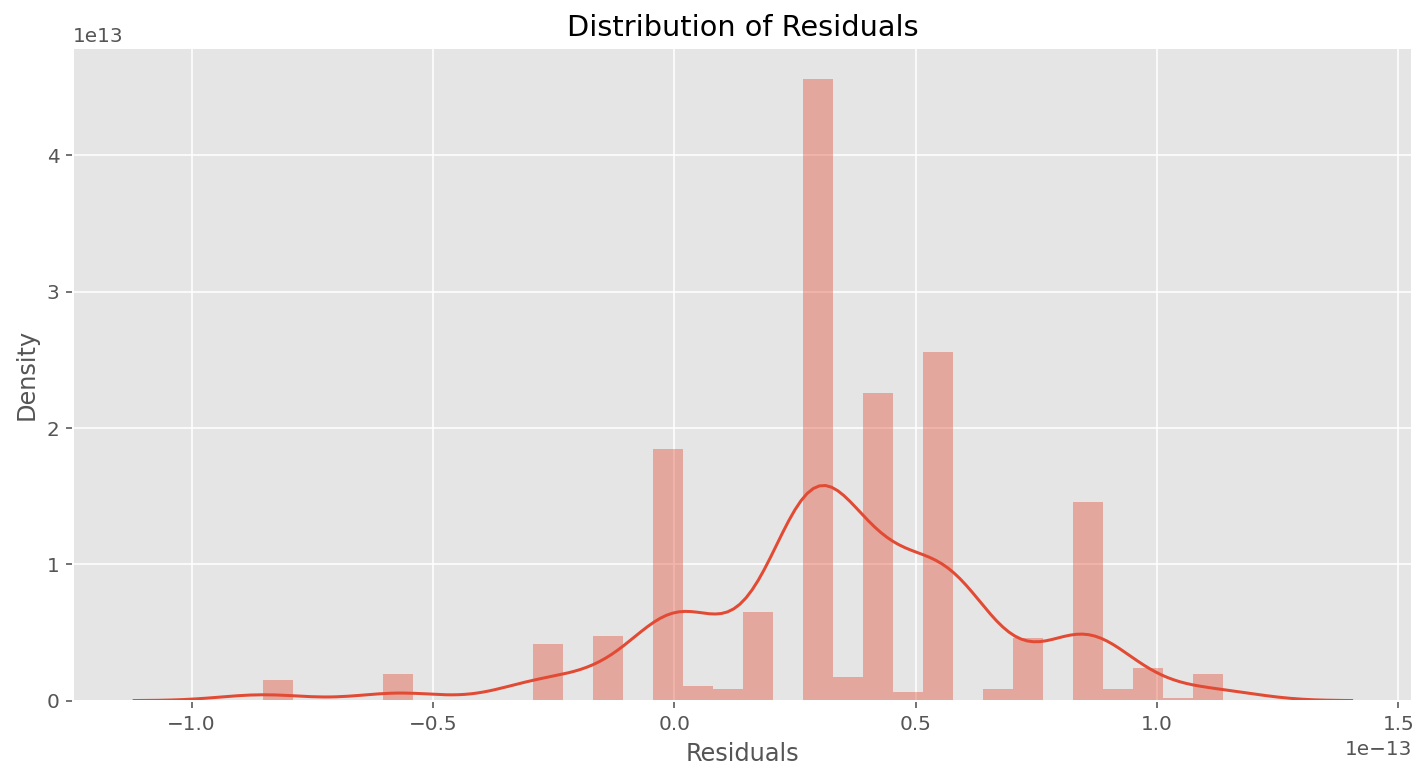


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [44]:
normal_errors_assumption(model1, X, y)

## III) No Multicollinearity among Predictors

In [45]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


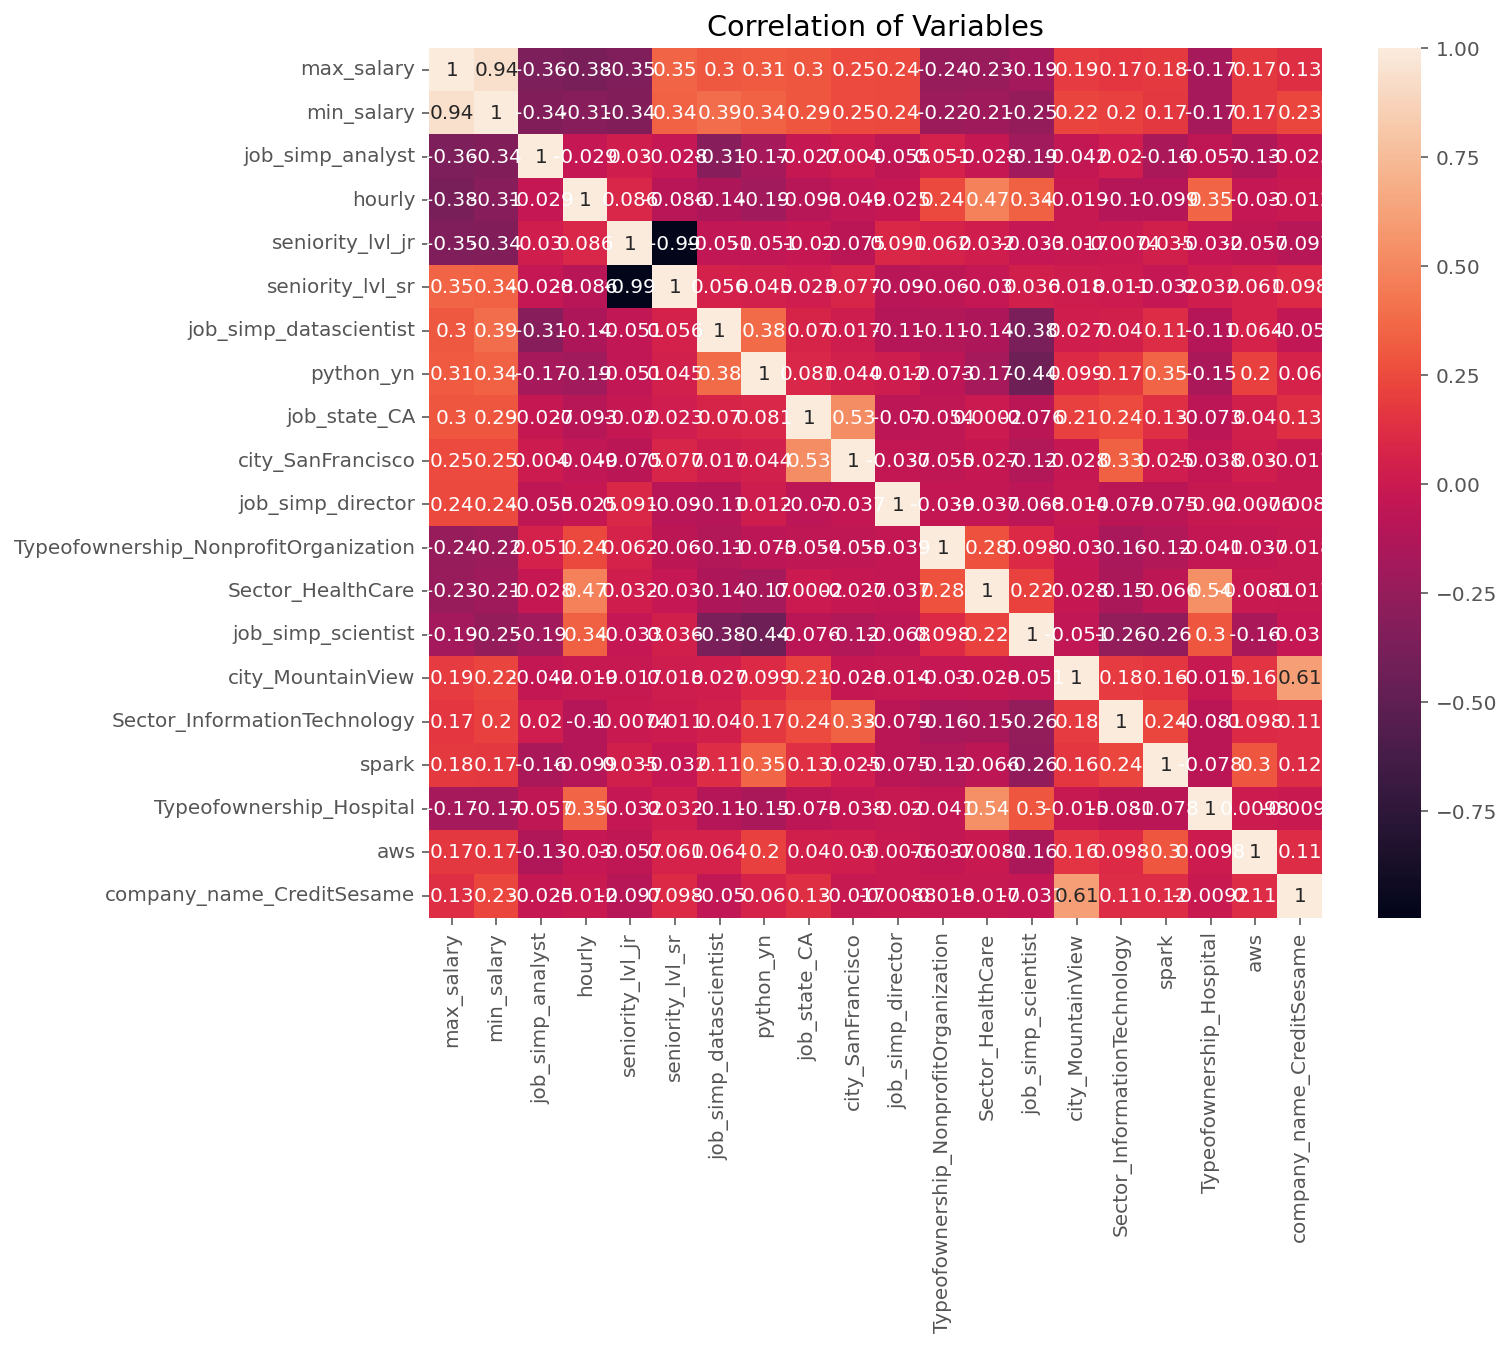

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
max_salary: 110.67113550256614
min_salary: 90.26937685833232
job_simp_analyst: 1.8580107628102374
hourly: 1.7235657696086721
seniority_lvl_jr: 13.790868521716423
seniority_lvl_sr: 8.898673251264821
job_simp_datascientist: 3.070668378410849
python_yn: 3.216604554613505
job_state_CA: 2.0091607116428314
city_SanFrancisco: 1.7263742131471076
job_simp_director: 1.3251279863606407
Typeofownership_NonprofitOrganization: 1.341980816161717
Sector_HealthCare: 1.9608138304101639
job_simp_scientist: 2.5404924681208207
city_MountainView: 1.8093700204977687
Sector_InformationTechnology: 1.7876951624421724
spark: 1.7560396667111189
Typeofownership_Hospital: 1.6728258187286817
aws: 1.5260910209104275
company_name_CreditSesame: 1.9441846043855926

3 cases of possible multicollinearity
1 cases of definite multicollinearity



In [46]:
# checking multicollinearity for our model
multicollinearity_assumption(model1, X.values, y, list(X.columns))


We can see from the VIF test above max and min salary seems to have high correlation among one another which leads to multicolinearity. Hence for our next model we are going to deal with that.

## IV) No Autocorrelation of the Error Terms

In [47]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [48]:
# Testing autocorelation assumption for our dataset
autocorrelation_assumption(model1, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.923988125407284
Signs of positive autocorrelation 

Assumption not satisfied


## V) Homoscedasticity

In [49]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


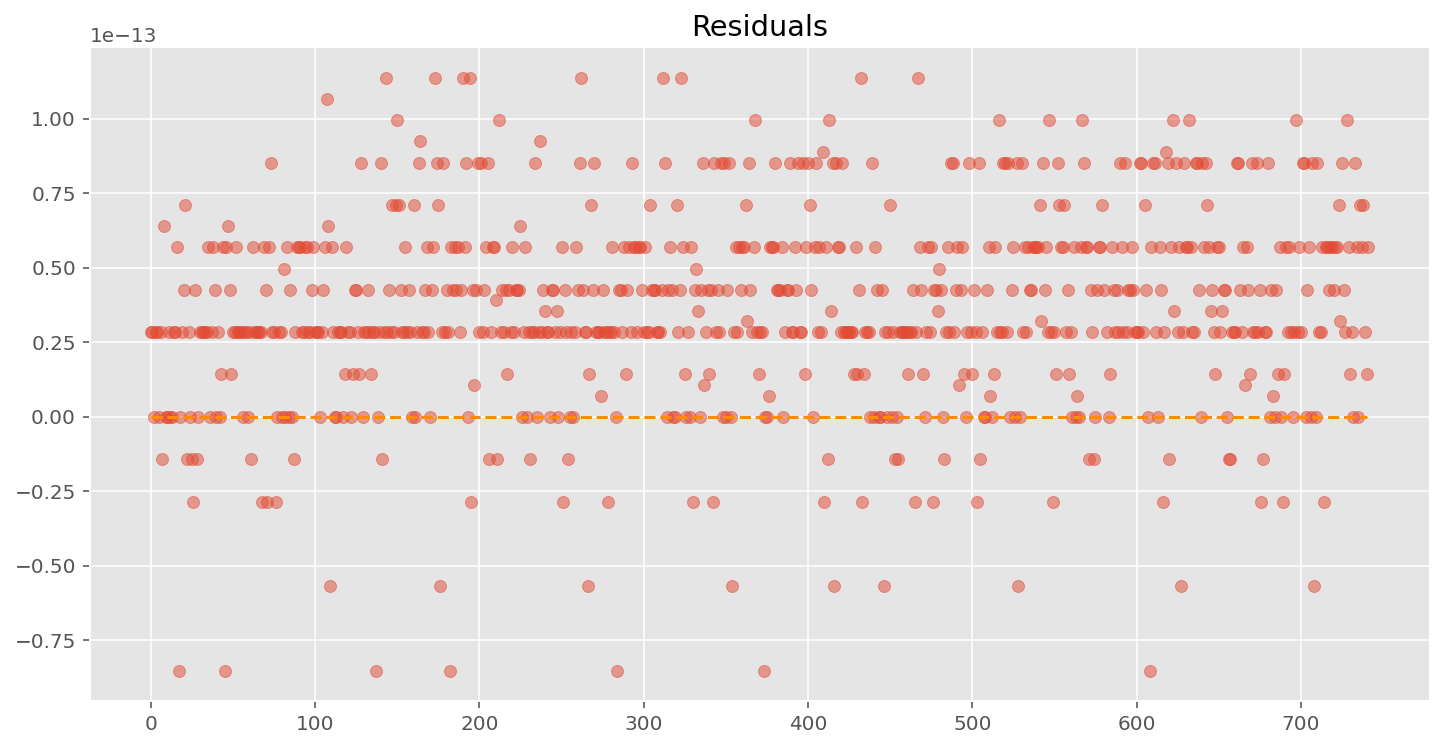

In [50]:
# checking homoscedaticity for model1
homoscedasticity_assumption(model1, X, y)

From the plot above we can see there is no pattern in the graph which leads us to believe the assumption for homoscedasticity is satisfied.

Assumption results:
After testing all the assumptions for linear model we can conclude that 4 out of 5 assumptions were satisfied except for multicollineariity. Which also makes sense as the same was observed in max_salary and min_salary.

## Model 2 : After Removing multicollinearity

In [51]:
df6 = df5.copy()
# df6 = df6.drop(columns=['Industry_HealthCareServices_Hospitals'], axis=1)
df6['max_min_salary'] = df6['max_salary'] - df6['min_salary']
df6 = df6.drop(['max_salary', 'min_salary'], axis=1)
df6.head()

Rating  hourly  employer_provided  avg_salary  same_state  age  python_yn  \
0     3.8       0                  0        72.0           0   47          1   
1     3.4       0                  0        87.5           0   36          1   
2     4.8       0                  0        85.0           1   10          1   
3     3.8       0                  0        76.5           1   55          1   
4     2.9       0                  0       114.5           1   22          1   

   R_yn  spark  aws  excel  Size_1to50employees  Size_10000+employees  \
0     0      0    0      1                    0                     0   
1     0      0    0      0                    0                     1   
2     0      1    0      1                    0                     0   
3     0      0    0      0                    0                     0   
4     0      0    0      1                    0                     0   

   Size_1001to5000employees  Size_201to500employees  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         1                       0   
4                         0                       0   

   Size_5001to10000employees  Size_501to1000employees  Size_51to200employees  \
0                          0                        1                      0   
1                          0                        0                      0   
2                          0                        1                      0   
3                          0                        0                      0   
4                          0                        0                      1   

   Size_Unknown  Typeofownership_College/University  \
0             0                                   0   
1             0                                   0   
2             0                                   0   
3             0                                   0   
4             0                                   0   

   Typeofownership_Company-Private  Typeofownership_Company-Public  \
0                                1                               0   
1                                0                               0   
2                                1                               0   
3                                0                               0   
4                                1                               0   

   Typeofownership_Government  Typeofownership_Hospital  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           1                         0   
4                           0                         0   

   Typeofownership_NonprofitOrganization  Typeofownership_OtherOrganization  \
0                                      0                                  0   
1                                      0                                  1   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Typeofownership_School/SchoolDistrict  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Typeofownership_SubsidiaryorBusinessSegment  Typeofownership_Unknown  \
0                                            0                        0   
1                                            0                        0   
2                                            0                        0   
3                                            0                        0   
4                                            0   

In [52]:
# Let us filter out features with strong correlation with target
# 1: is used to remove Average Salary itself
df6.columns = [col.replace(",", "_") for col in df6.columns]
df6_corr = df6.corr()
average_top20_corr = df6_corr.avg_salary.abs().sort_values(ascending=False).head(21)
print(f"Top 20 features which are having strong correlation with AverageSalary are \n {average_top20_corr[1:]}")

df6_top20_corr = df6[average_top20_corr.index].corr()

Top 20 features which are having strong correlation with AverageSalary are 
 max_min_salary                           0.770061
job_simp_analyst                         0.357310
hourly                                   0.356028
seniority_lvl_jr                         0.353295
seniority_lvl_sr                         0.350582
job_simp_datascientist                   0.339264
python_yn                                0.328707
job_state_CA                             0.299702
city_SanFrancisco                        0.250968
job_simp_director                        0.242901
Typeofownership_NonprofitOrganization    0.235563
Sector_HealthCare                        0.225894
job_simp_scientist                       0.213592
city_MountainView                        0.205935
Sector_InformationTechnology             0.183537
spark                                    0.176933
Typeofownership_Hospital                 0.172421
aws                                      0.171764
company_name_CreditSesa

In [53]:
# Model 2 with top 20 correlated features with AvgSalary after removing multicollinearity
top_20_features = df6_top20_corr.index[1:21]
X = df6[top_20_features]
y = df6['avg_salary']
data = pd.concat([X,y], axis=1)


In [54]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

# building first model with top3 features
formula = f"avg_salary ~ {'+'.join(top_20_features)}"
data = pd.concat([X_train,y_train], axis=1)
model2 = smf.ols(formula, data=data).fit()
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          1.88e-176
Time:                        09:37:09   Log-Likelihood:                -2184.9
No. Observations:                 518   AIC:                             4410.
Df Residuals:                     498   BIC:                             4495.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                16.0835     12.651      1.271      0.204      -8.773      40.940
max_min_salary                            1.2520      0.050     24.904      0.000       1.153       1.351
job_simp_analyst                         -7.4685      2.706     -2.760      0.006     -12.786      -2.151
hourly                                    4.2961      5.693      0.755      0.451      -6.889      15.481
seniority_lvl_jr                          1.5978     12.143      0.132      0.895     -22.259      25.455
seniority_lvl_sr                         14.7617     12.126      1.217      0.224      -9.064      38.587
job_simp_datascientist                   18.8253      1.912      9.844      0.000      15.068      22.583
python_yn                                 4.4990      1.772      2.539      0.011       1.017       7.981
job_state_CA                              6.6478      2.351      2.828      0.005       2.030      11.266
city_SanFrancisco                        12.0875      3.696      3.271      0.001       4.826      19.349
job_simp_director                        51.1676      5.604      9.131      0.000      40.158      62.177
Typeofownership_NonprofitOrganization    -3.0956      3.203     -0.966      0.334      -9.389       3.198
Sector_HealthCare                        -2.6964      4.236     -0.637      0.525     -11.018       5.626
job_simp_scientist                       -3.6299      2.666     -1.361      0.174      -8.869       1.609
city_MountainView                        16.7326     10.125      1.653      0.099      -3.161      36.627
Sector_InformationTechnology              4.6246      1.993      2.320      0.021       0.709       8.540
spark                                     0.4036      2.032      0.199      0.843      -3.589       4.397
Typeofownership_Hospital                 -6.9075      7.116     -0.971      0.332     -20.889       7.074
aws                                      -1.1331      1.866     -0.607      0.544      -4.799       2.533
company_name_CreditSesame                52.4099      7.914      6.622      0.000      36.861      67.959
Competitors_CreditKarma_LendUp_SoFi      52.4099      7.914      6.622      0.000      36.861      67.959
==============================================================================
Omnibus:                      185.156   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1242.118
Skew:                           1.396   Prob(JB):                    1.89e-270
Kurtosis:                      10.054   Cond. No.                     1.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

We can see the by selecting more features and by dealing with multicollinearity there is definitely improvement in the model. as from 1 the value has gone down to 79.5% however it is atleast realiable as there is no multicollinearity 

In [55]:
result = {
          "Model #": "Model2",
          "Model_Desc": "Top 20 Correlated features - Removed Multicollinearity",
          "Feauters": [model2.params.index[1:]] ,
          "Number of features": len(model2.params.index[1:]),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


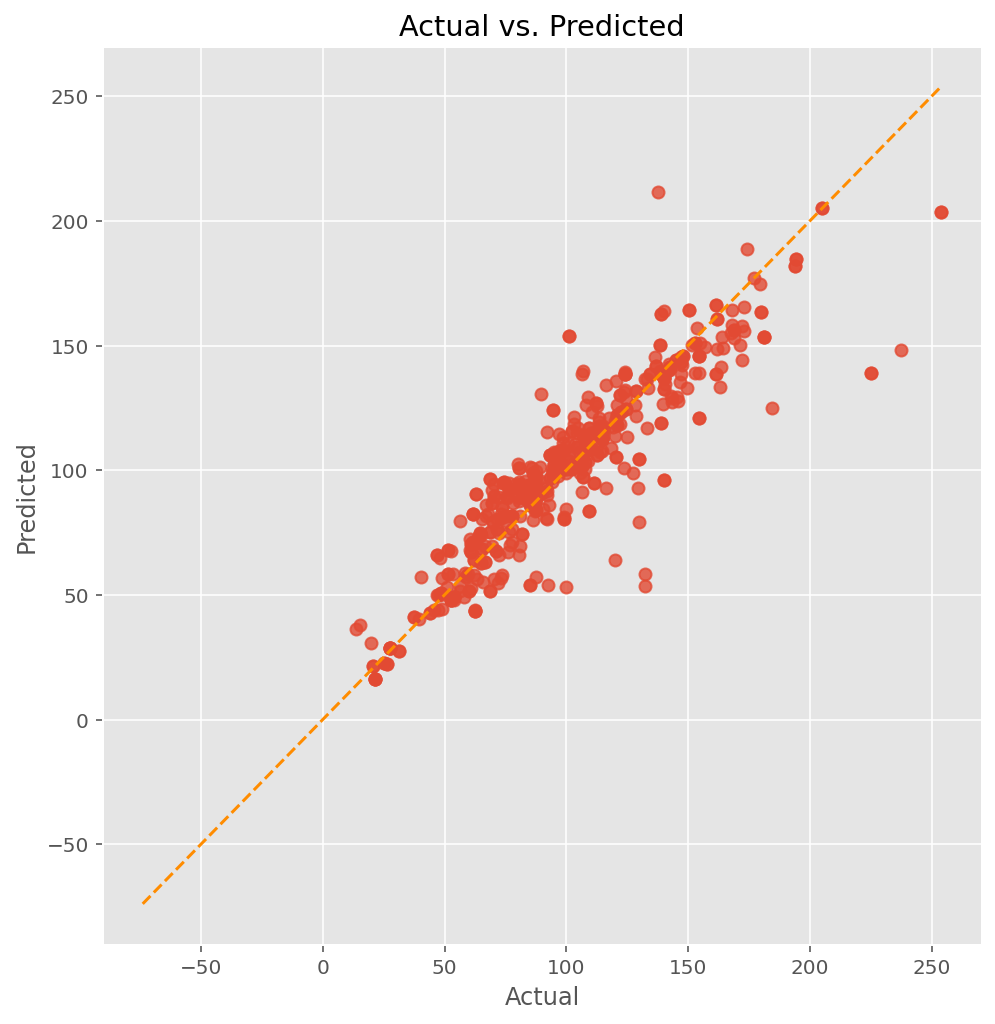

In [56]:
# Let us recheck our 5 assumptions fro this new model
linear_assumption(model2, X_train, y_train)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.550194804927702e-30
Residuals are not normally distributed


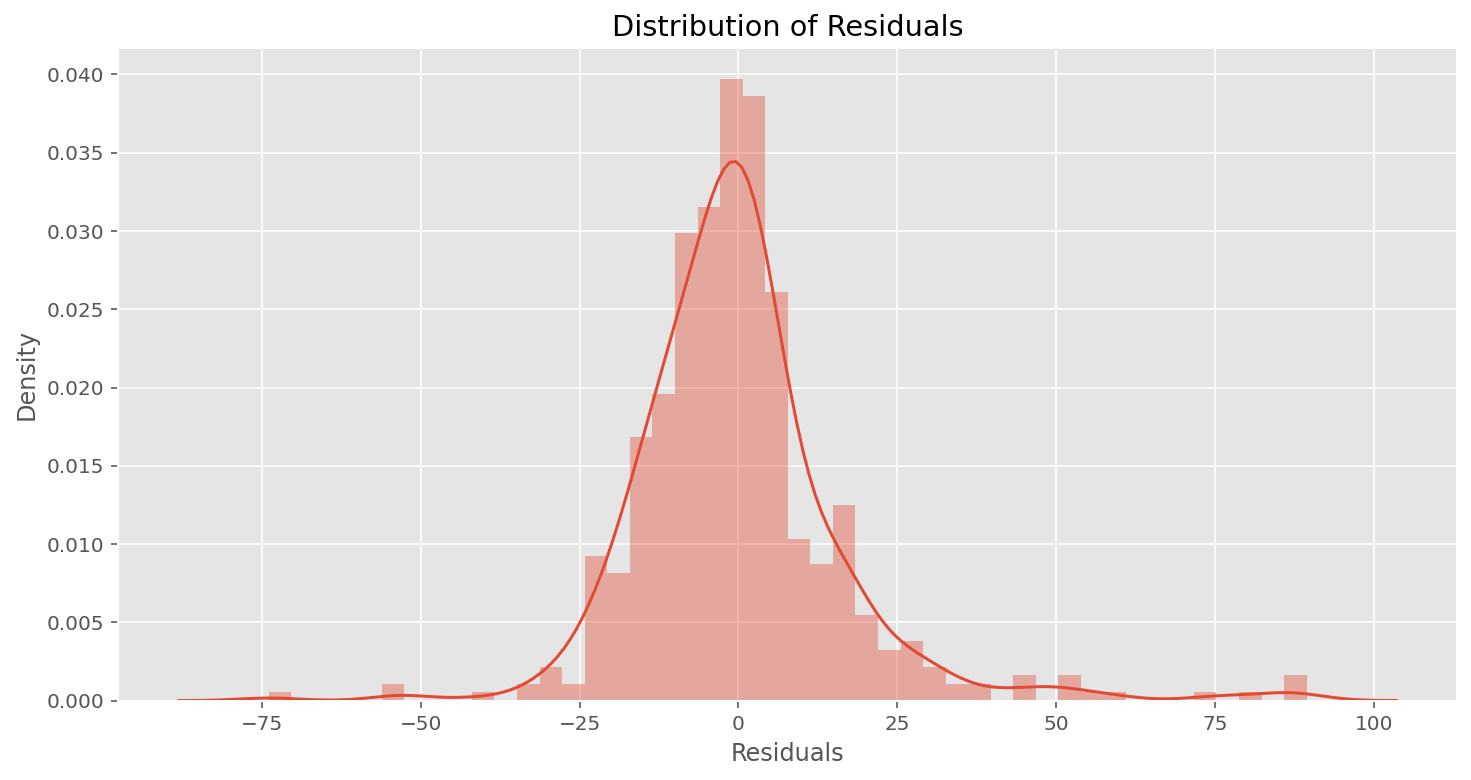


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [57]:
normal_errors_assumption(model2, X_train, y_train)

Assumption 3: Little to no multicollinearity among predictors


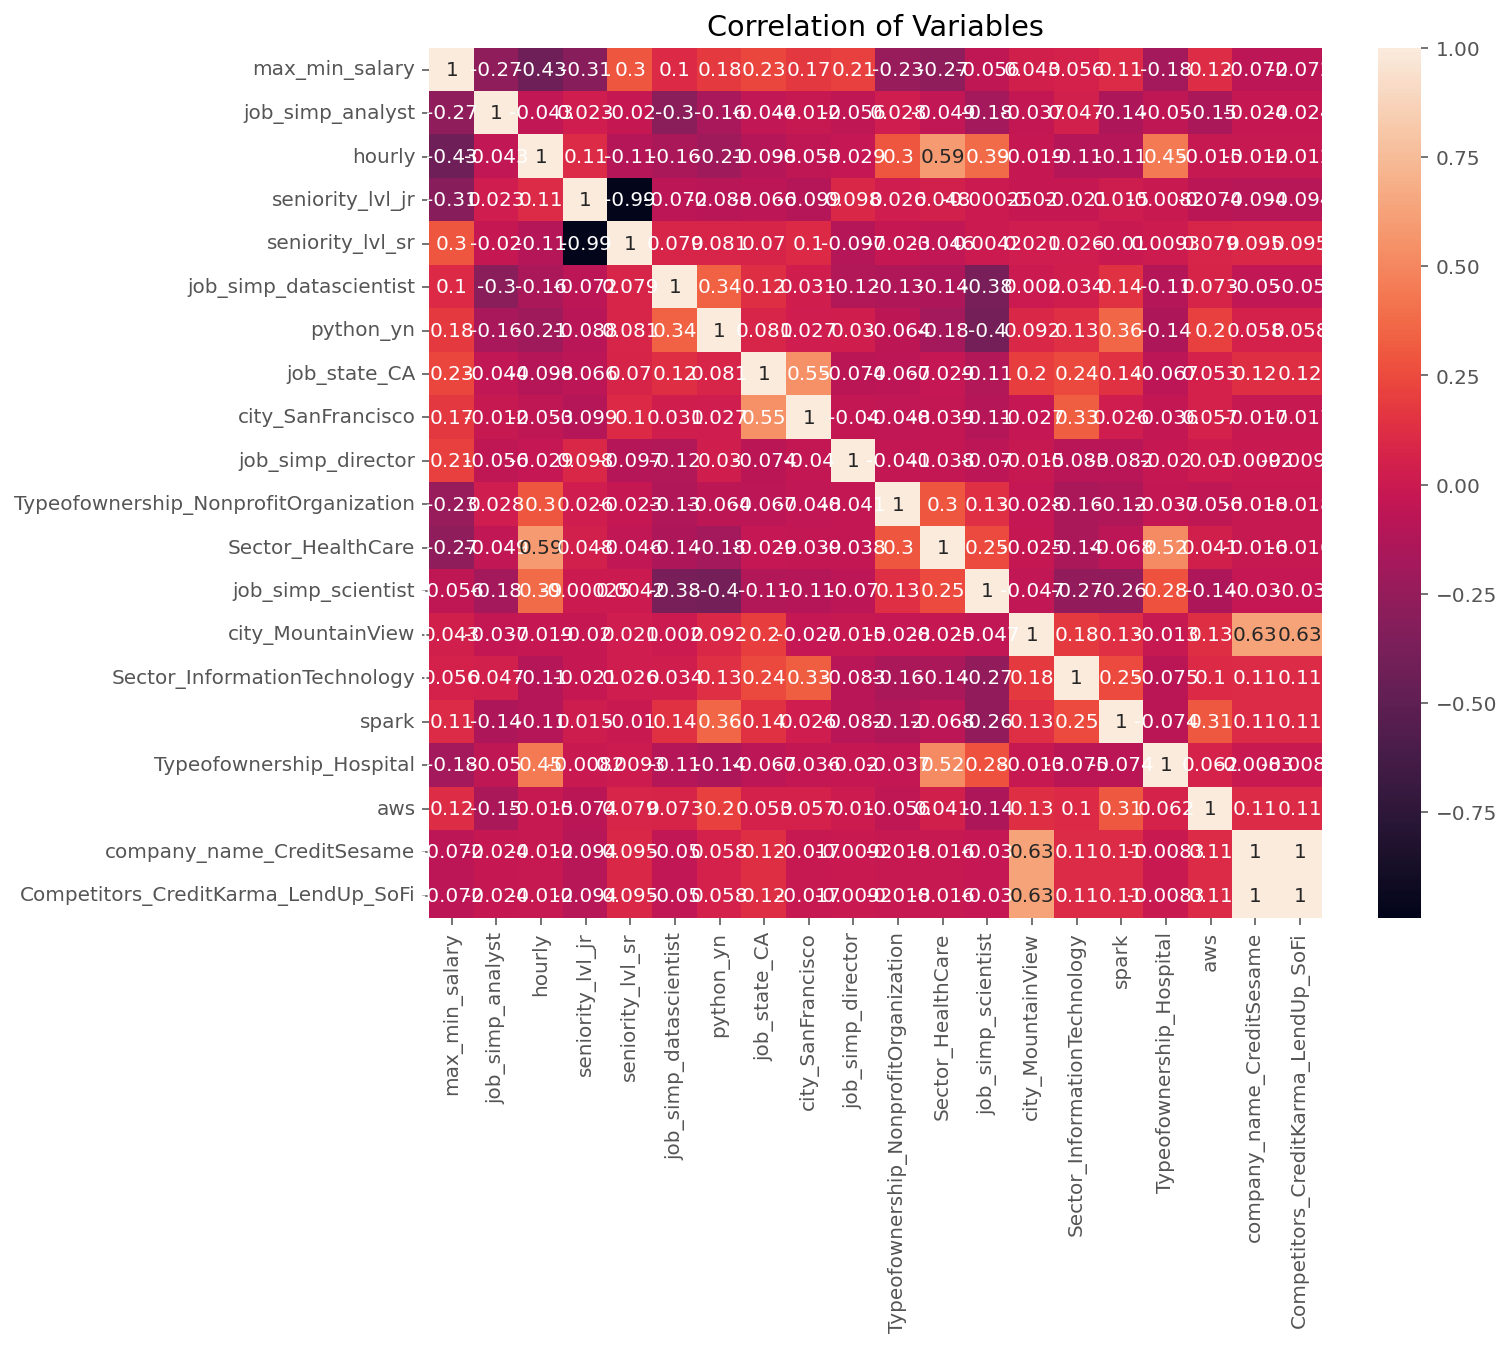

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
max_min_salary: 13.477866205904673
job_simp_analyst: 1.6805493949967196
hourly: 2.164342825900401
seniority_lvl_jr: 11.607980868634654
seniority_lvl_sr: 7.542355663516574
job_simp_datascientist: 2.6315976295310817
python_yn: 3.054013373112126
job_state_CA: 2.040863289641754
city_SanFrancisco: 1.7513560094206673
job_simp_director: 1.218412365301008
Typeofownership_NonprofitOrganization: 1.388082797297064
Sector_HealthCare: 2.04487686530986
job_simp_scientist: 2.406017823351835
city_MountainView: 1.822931552474989
Sector_InformationTechnology: 1.7545402191147765
spark: 1.8055119578342793
Typeofownership_Hospital: 1.6236354914420752
aws: 1.5614282054460944
company_name_CreditSesame: inf
Competitors_CreditKarma_LendUp_SoFi: inf

4 cases of possible multicollinearity
2 cases of definite multicollinearity

Assump

In [58]:
multicollinearity_assumption(model2, X_train.values, y_train, list(X_train.columns))


In [59]:
autocorrelation_assumption(model2, X_train, y_train)


Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.840612813728766
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


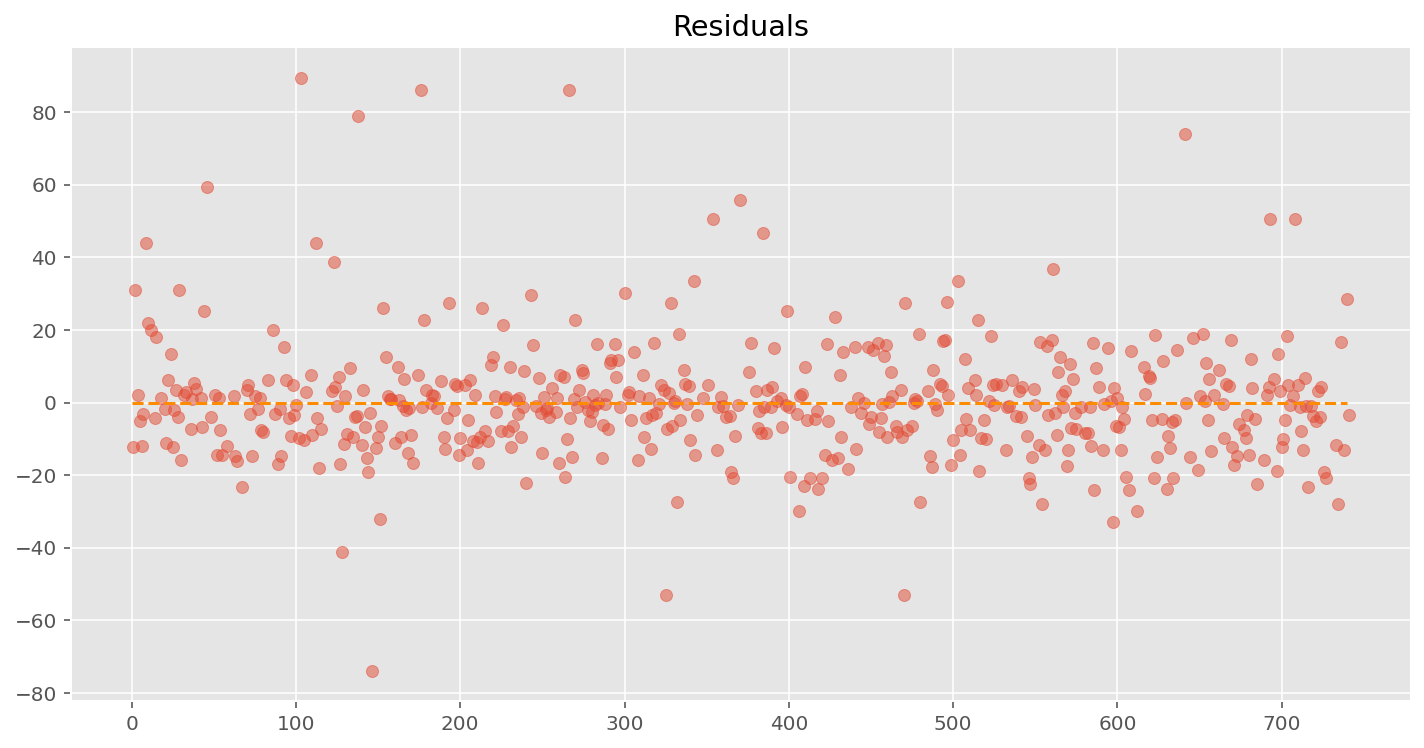

In [60]:
homoscedasticity_assumption(model2, X_train, y_train)

# Model3: Using top 10 features and removing multicollinearity features

In [61]:
# Let us filter out features with strong correlation with target
# 1: is used to remove Average Salary itself
df6.columns = [col.replace(",", "_") for col in df6.columns]
df6_corr = df6.corr()
average_top10_corr = df6_corr.avg_salary.abs().sort_values(ascending=False).head(11)
print(f"Top 10 features which are having strong correlation with AverageSalary are \n {average_top10_corr[1:]}")

df6_top10_corr = df6[average_top10_corr.index].corr()


# Model 3 with top 10 correlated features with SalePrice
top_10_features = df6_top10_corr.index[1:21]
X = df6[top_10_features]
y = df6['avg_salary']
data = pd.concat([X,y], axis=1)


Top 10 features which are having strong correlation with AverageSalary are 
 max_min_salary            0.770061
job_simp_analyst          0.357310
hourly                    0.356028
seniority_lvl_jr          0.353295
seniority_lvl_sr          0.350582
job_simp_datascientist    0.339264
python_yn                 0.328707
job_state_CA              0.299702
city_SanFrancisco         0.250968
job_simp_director         0.242901
Name: avg_salary, dtype: float64


In [62]:
# building 3 model with top10 features

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

# building first model with top3 features
formula = f"avg_salary ~ {'+'.join(top_10_features)}"
data = pd.concat([X_train,y_train], axis=1)
model3 = smf.ols(formula, data=data).fit()
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          1.47e-162
Time:                        09:37:23   Log-Likelihood:                -2241.7
No. Observations:                 518   AIC:                             4505.
Df Residuals:                     507   BIC:                             4552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 19.9643     13.920      1.434      0.152      -7.385      47.313
max_min_salary             1.1732      0.053     22.035      0.000       1.069       1.278
job_simp_analyst          -7.5974      2.757     -2.755      0.006     -13.015      -2.180
hourly                    -6.7315      5.022     -1.340      0.181     -16.598       3.135
seniority_lvl_jr          -0.0625     13.321     -0.005      0.996     -26.233      26.108
seniority_lvl_sr          14.8215     13.303      1.114      0.266     -11.315      40.958
job_simp_datascientist    18.1239      1.899      9.543      0.000      14.393      21.855
python_yn                  7.1625      1.780      4.023      0.000       3.665      10.660
job_state_CA              12.0733      2.493      4.842      0.000       7.175      16.972
city_SanFrancisco         10.5225      3.840      2.740      0.006       2.979      18.066
job_simp_director         53.4015      5.994      8.909      0.000      41.626      65.177
==============================================================================
Omnibus:                      257.235   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.809
Skew:                           1.982   Prob(JB):                         0.00
Kurtosis:                      12.404   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
result = {
          "Model #": "Model3",
          "Model_Desc": "Top 10 Correlated features - Removed Multicollinearity",
          "Feauters": [model3.params.index[1:]] ,
          "Number of features": len(model3.params.index[1:]),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


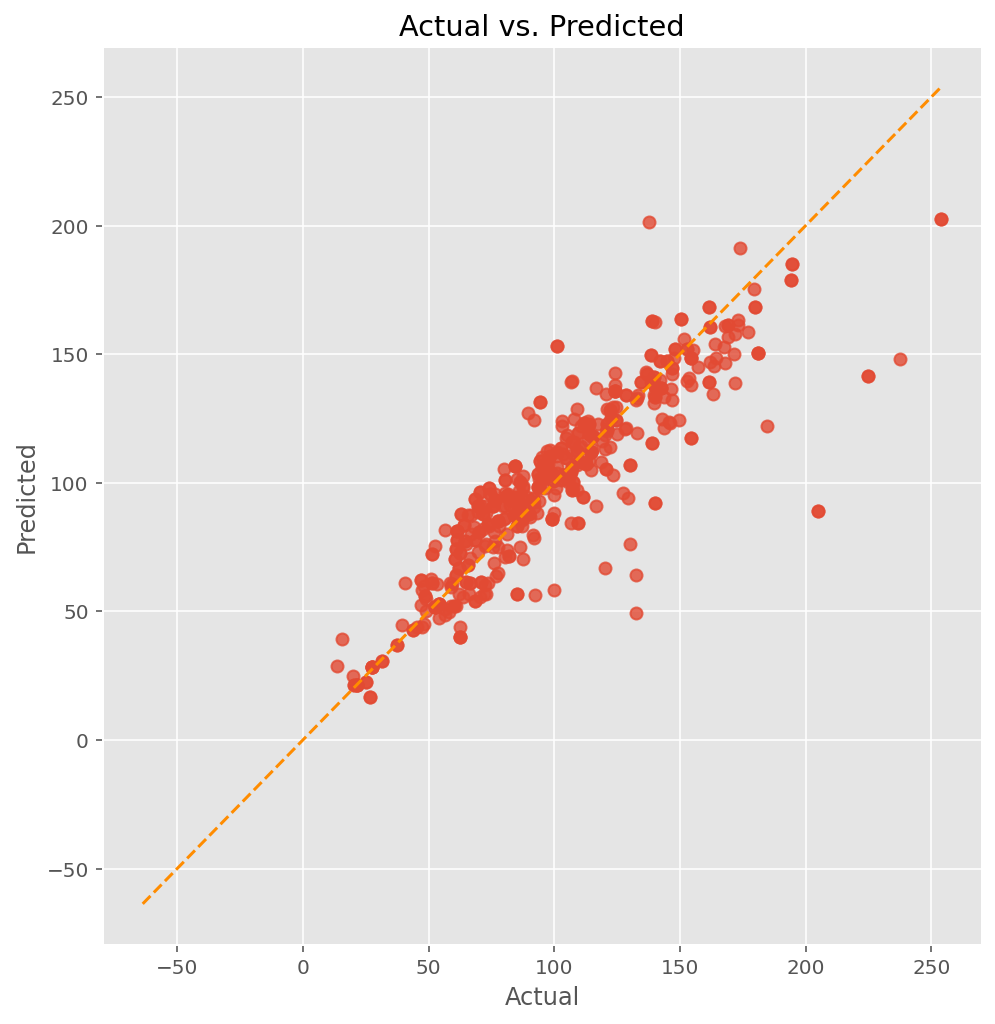

In [64]:
linear_assumption(model3, X_train, y_train)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


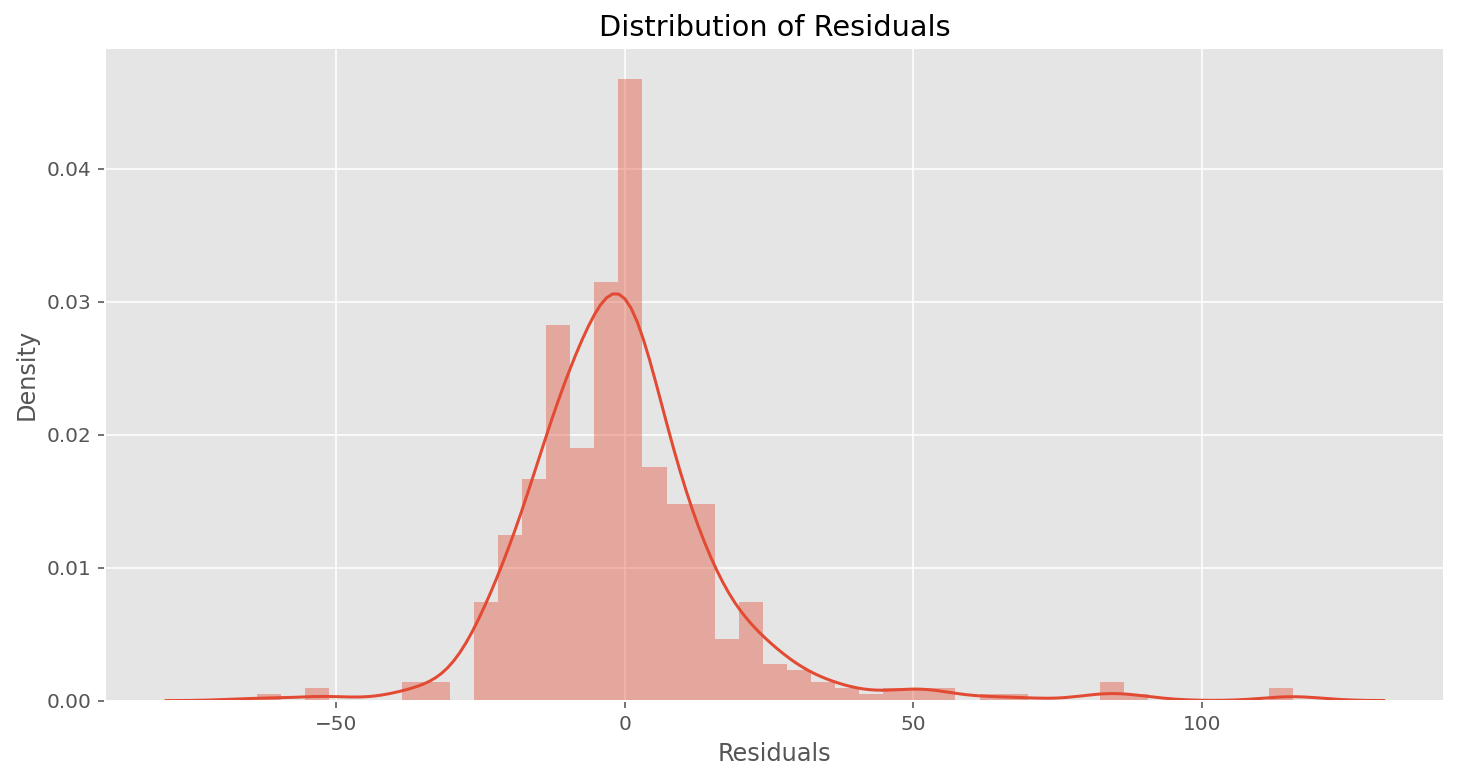


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [65]:
normal_errors_assumption(model3, X_train, y_train)


Assumption 3: Little to no multicollinearity among predictors


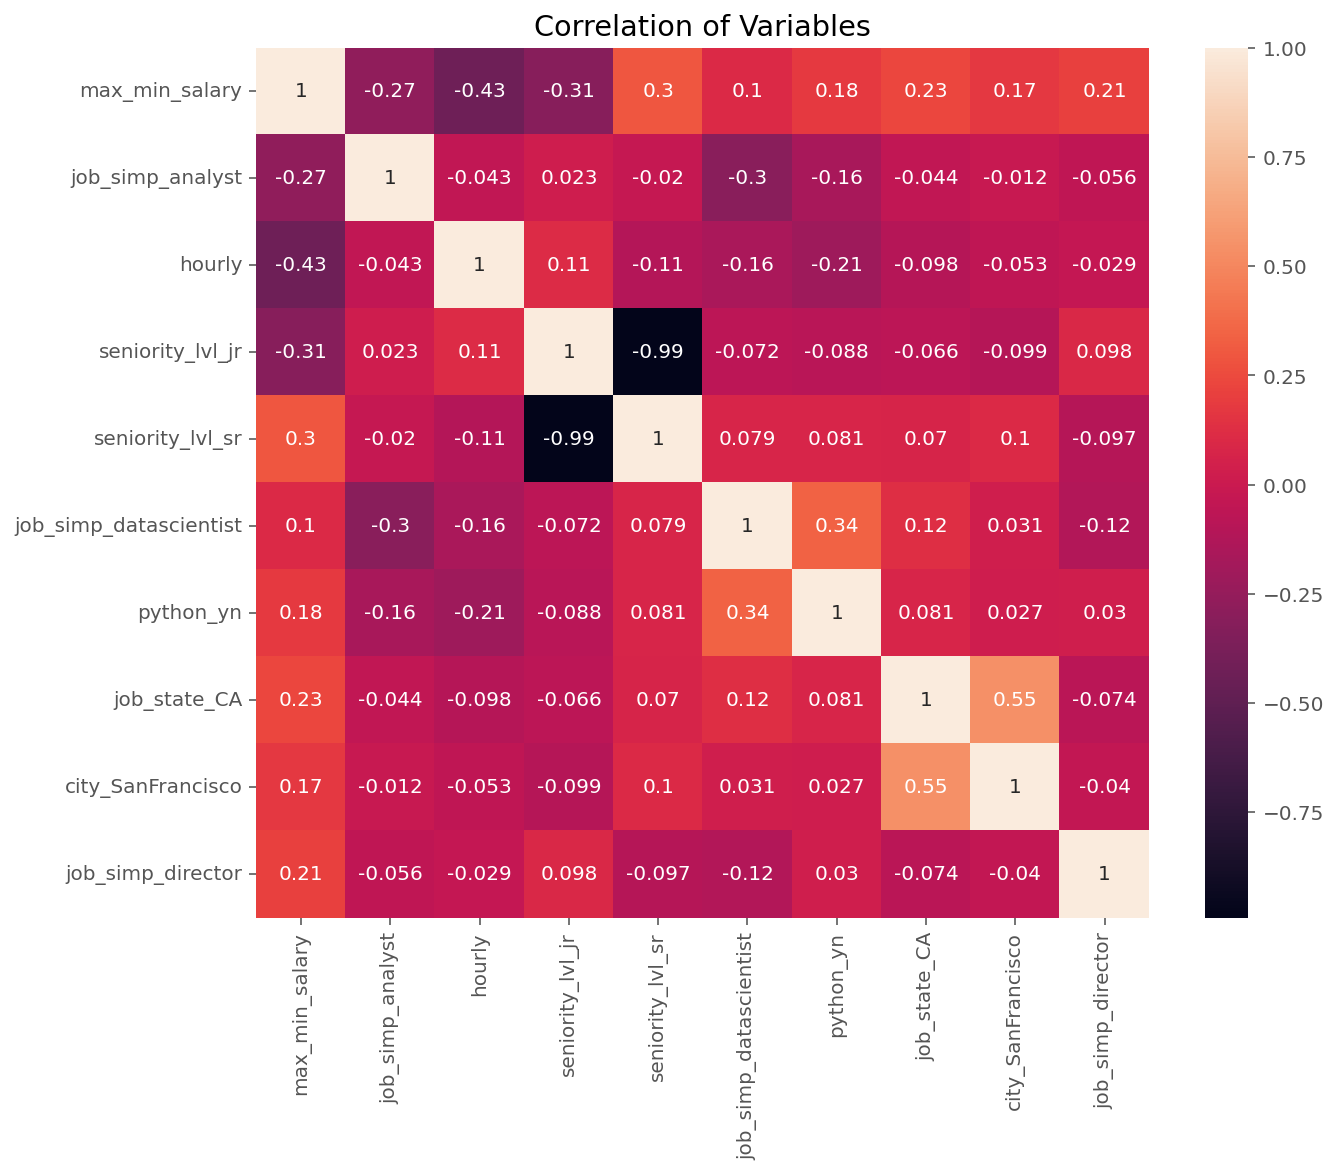

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
max_min_salary: 12.43721415973413
job_simp_analyst: 1.4225001176206113
hourly: 1.3616837214031476
seniority_lvl_jr: 9.439706818589897
seniority_lvl_sr: 6.245373618466024
job_simp_datascientist: 2.1213912265534884
python_yn: 2.522903819191126
job_state_CA: 1.876420133326788
city_SanFrancisco: 1.5454861017356343
job_simp_director: 1.1411203961368828

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [66]:
multicollinearity_assumption(model3, X_train.values, y_train, list(X.columns))


In [67]:
autocorrelation_assumption(model3, X_train, y_train)


Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9050150923362856
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


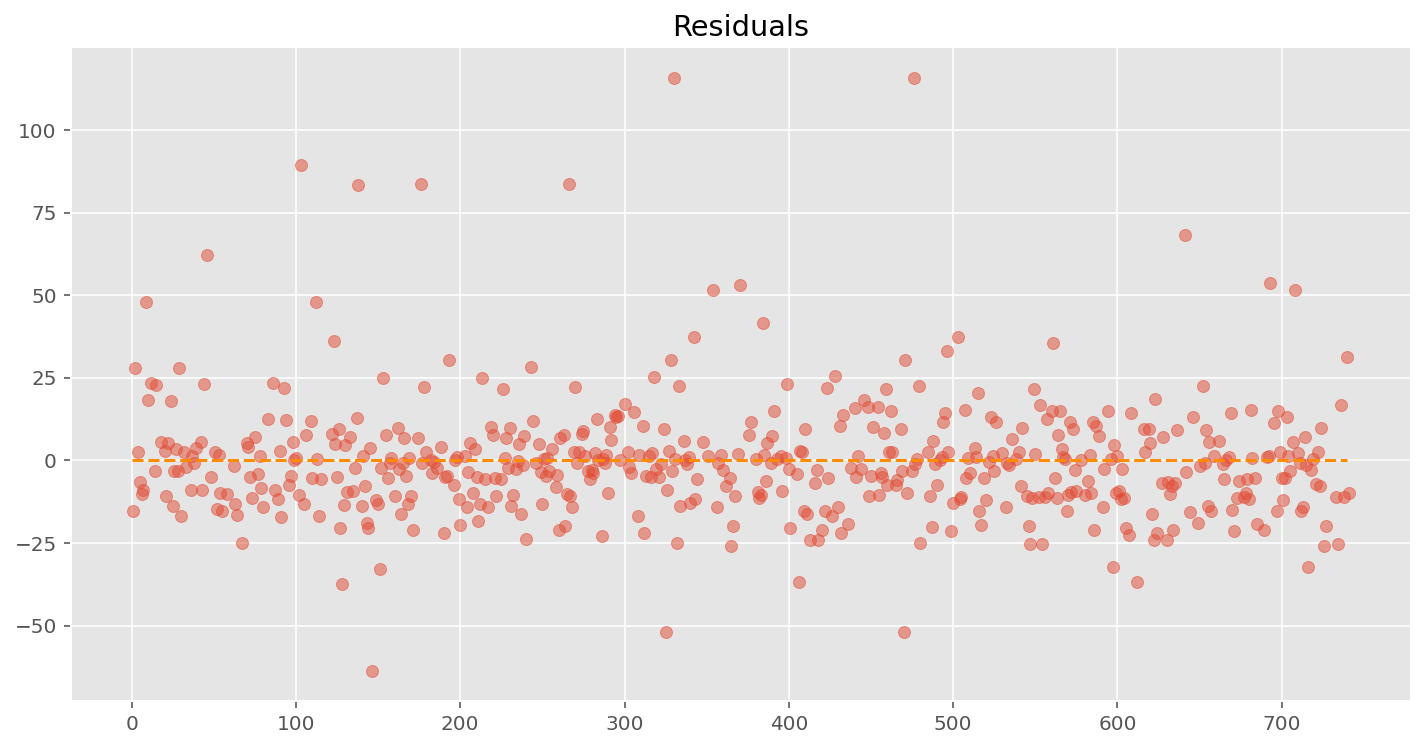

In [68]:
homoscedasticity_assumption(model3, X_train, y_train)

# Model4: Dealing with outliers

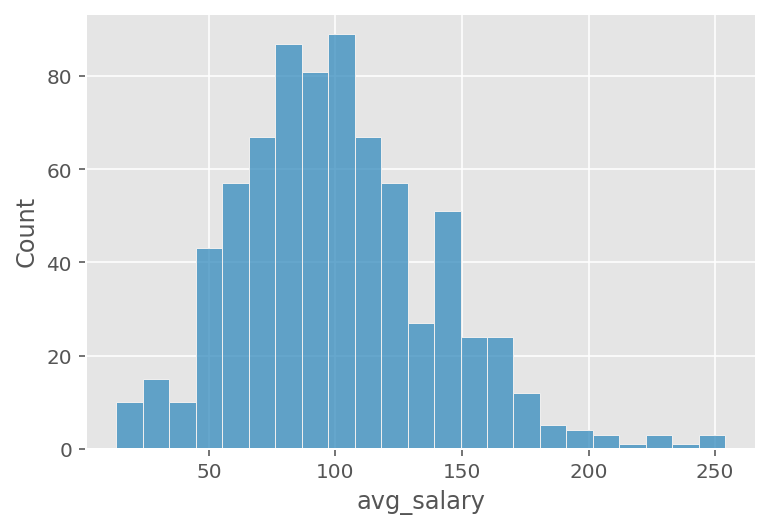

In [69]:
df7 = df6.copy()
sns.histplot(df7.avg_salary)

In [70]:
# Computing IQR
Q1 = df7['avg_salary'].quantile(0.25)
Q3 = df7['avg_salary'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df7.query('(@Q1 - 1.5 * @IQR) <= avg_salary <= (@Q3 + 1.5 * @IQR)')
df7 = filtered

print(f"There are total {df7.shape[0]} rows in filtered dataset and {df7.shape[1]} columns.")
df7.head()

There are total 730 rows in filtered dataset and 782 columns.


Rating  hourly  employer_provided  avg_salary  same_state  age  python_yn  \
0     3.8       0                  0        72.0           0   47          1   
1     3.4       0                  0        87.5           0   36          1   
2     4.8       0                  0        85.0           1   10          1   
3     3.8       0                  0        76.5           1   55          1   
4     2.9       0                  0       114.5           1   22          1   

   R_yn  spark  aws  excel  Size_1to50employees  Size_10000+employees  \
0     0      0    0      1                    0                     0   
1     0      0    0      0                    0                     1   
2     0      1    0      1                    0                     0   
3     0      0    0      0                    0                     0   
4     0      0    0      1                    0                     0   

   Size_1001to5000employees  Size_201to500employees  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         1                       0   
4                         0                       0   

   Size_5001to10000employees  Size_501to1000employees  Size_51to200employees  \
0                          0                        1                      0   
1                          0                        0                      0   
2                          0                        1                      0   
3                          0                        0                      0   
4                          0                        0                      1   

   Size_Unknown  Typeofownership_College/University  \
0             0                                   0   
1             0                                   0   
2             0                                   0   
3             0                                   0   
4             0                                   0   

   Typeofownership_Company-Private  Typeofownership_Company-Public  \
0                                1                               0   
1                                0                               0   
2                                1                               0   
3                                0                               0   
4                                1                               0   

   Typeofownership_Government  Typeofownership_Hospital  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           1                         0   
4                           0                         0   

   Typeofownership_NonprofitOrganization  Typeofownership_OtherOrganization  \
0                                      0                                  0   
1                                      0                                  1   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Typeofownership_School/SchoolDistrict  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Typeofownership_SubsidiaryorBusinessSegment  Typeofownership_Unknown  \
0                                            0                        0   
1                                            0                        0   
2                                            0                        0   
3                                            0                        0   
4                                            0   

[Text(0.5, 1.0, 'Histogram for Filtered SalePrice')]

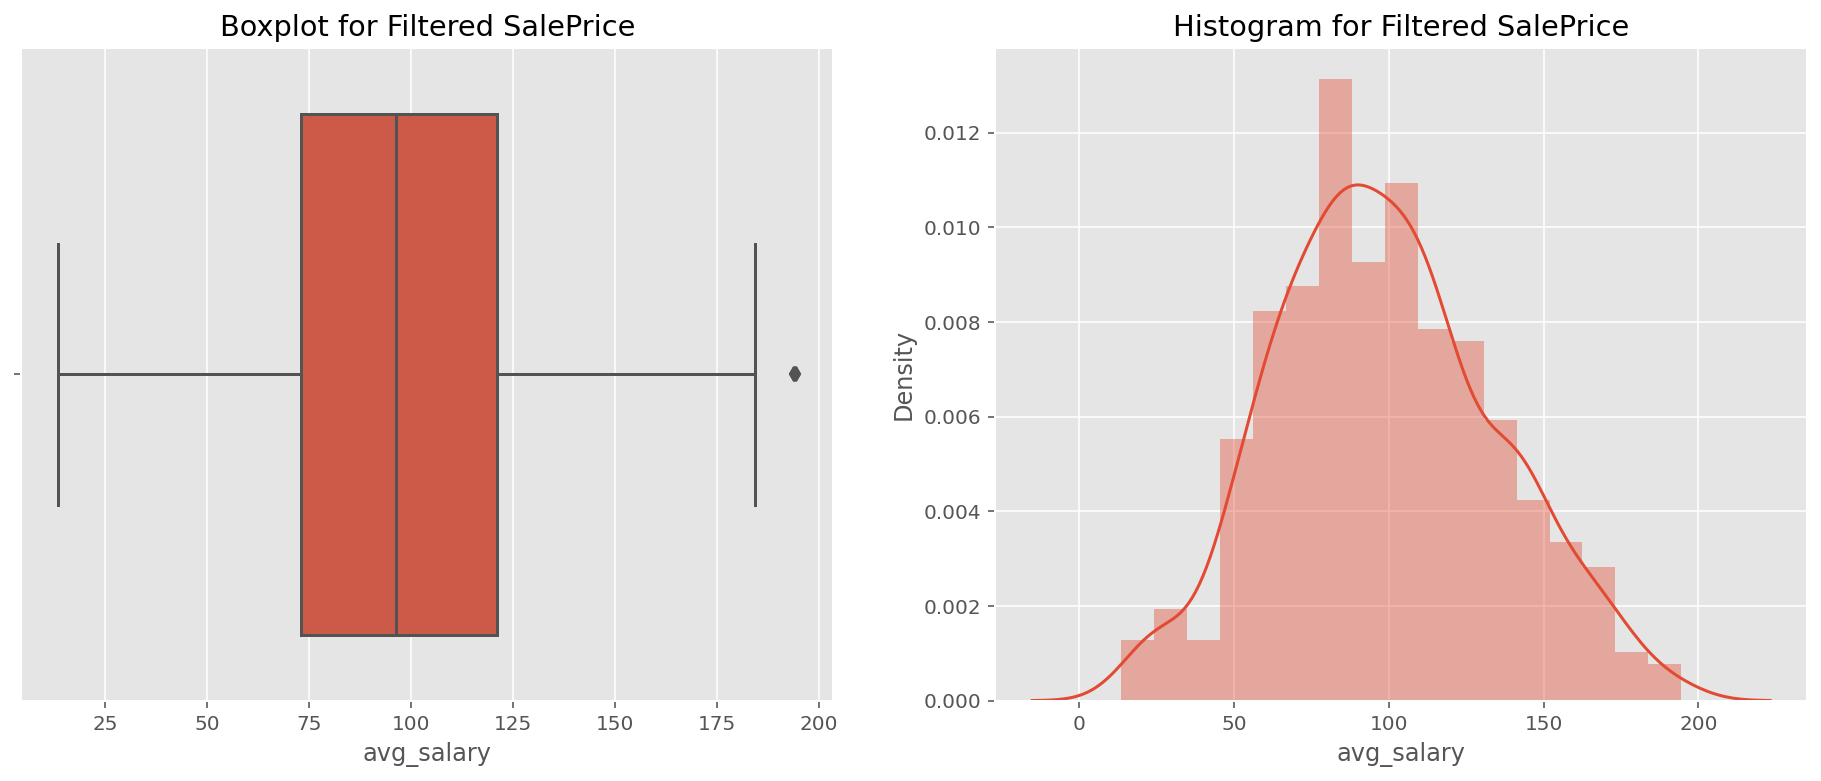

In [71]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
sns.boxplot(df7.avg_salary, ax=axs[0]).set(title="Boxplot for Filtered SalePrice")
sns.distplot(df7.avg_salary, ax=axs[1]).set(title="Histogram for Filtered SalePrice")

In [72]:
# df7 = df7.drop(["Typeofownership_Hospital", "hourly", "company_name_BeebeHealthcare", "job_state_DE", "company_name_BeebeHealthcare", "job_state_DE"], axis=1)
# df7 = df7.drop(["company_name_BeebeHealthcare", "job_state_DE"], axis=1)

In [73]:
# Let us filter out features with strong correlation with target
# 1: is used to remove Average Salary itself

df7.columns = [col.replace(",", "_").replace("(", "").replace(")", "").replace("$", "").replace("+", "").replace("-", "_") for col in df7.columns]
df7_corr = df7.corr()
average_top10_corr = df7_corr.avg_salary.abs().sort_values(ascending=False).head(21)
print(f"Top 20 features which are having strong correlation with AverageSalary are \n {average_top10_corr[1:]}")

df7_top10_corr = df7[average_top10_corr.index].corr()


# Model 1 with top 3 correlated features with SalePrice
top_10_features = df7_top10_corr.index[1:21]
X = df7[top_10_features]
y = df7['avg_salary']
data = pd.concat([X,y], axis=1)


Top 20 features which are having strong correlation with AverageSalary are 
 max_min_salary                           0.803921
job_simp_datascientist                   0.386110
hourly                                   0.380395
job_simp_analyst                         0.370331
seniority_lvl_jr                         0.357200
seniority_lvl_sr                         0.353819
python_yn                                0.310935
job_state_CA                             0.283358
Sector_HealthCare                        0.254488
Typeofownership_NonprofitOrganization    0.242923
city_SanFrancisco                        0.220269
job_simp_scientist                       0.207944
Typeofownership_Company_Public           0.205245
spark                                    0.196000
job_state_DE                             0.181445
company_name_BeebeHealthcare             0.181445
Typeofownership_Hospital                 0.181195
Sector_InformationTechnology             0.171847
aws                    

In [74]:
# building first model with top3 features
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

# building first model with top3 features
formula = f"avg_salary ~ {'+'.join(top_10_features)}"
data = pd.concat([X_train,y_train], axis=1)
model4 = smf.ols(formula, data=data).fit()
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          4.10e-155
Time:                        09:38:39   Log-Likelihood:                -2149.2
No. Observations:                 511   AIC:                             4338.
Df Residuals:                     491   BIC:                             4423.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                13.5128     17.198      0.786      0.432     -20.278      47.303
max_min_salary                            1.2723      0.050     25.348      0.000       1.174       1.371
job_simp_datascientist                   15.7144      1.861      8.444      0.000      12.058      19.371
hourly                                    4.8512      6.340      0.765      0.445      -7.606      17.308
job_simp_analyst                        -10.9101      2.581     -4.227      0.000     -15.982      -5.838
seniority_lvl_jr                          8.8950     16.786      0.530      0.596     -24.087      41.877
seniority_lvl_sr                         18.5870     16.772      1.108      0.268     -14.367      51.541
python_yn                                 1.7531      1.766      0.992      0.321      -1.718       5.224
job_state_CA                              4.0276      2.330      1.729      0.085      -0.551       8.606
Sector_HealthCare                        -1.5847      3.868     -0.410      0.682      -9.184       6.014
Typeofownership_NonprofitOrganization    -4.0928      3.244     -1.262      0.208     -10.466       2.280
city_SanFrancisco                         7.4005      3.770      1.963      0.050      -0.006      14.807
job_simp_scientist                       -7.7501      2.633     -2.943      0.003     -12.924      -2.577
Typeofownership_Company_Public            3.6348      1.727      2.105      0.036       0.242       7.027
spark                                    -1.4352      2.006     -0.715      0.475      -5.377       2.507
job_state_DE                             -1.4355      5.670     -0.253      0.800     -12.575       9.704
company_name_BeebeHealthcare             -1.4355      5.670     -0.253      0.800     -12.575       9.704
Typeofownership_Hospital                -10.5673      7.421     -1.424      0.155     -25.148       4.013
Sector_InformationTechnology              4.2773      1.961      2.181      0.030       0.424       8.131
aws                                      -0.3176      1.867     -0.170      0.865      -3.987       3.351
city_SanJose                              7.7342      6.010      1.287      0.199      -4.075      19.543
==============================================================================
Omnibus:                      203.536   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.729
Skew:                           1.633   Prob(JB):                    2.05e-263
Kurtosis:                       9.793   Cond. No.                     3.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

In [75]:
result = {
          "Model #": "Model4",
          "Model_Desc": "Top 10 features - Removed Outlier from target",
          "Feauters": [model4.params.index[1:]] ,
          "Number of features": len(model4.params.index[1:]),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01  
3       0.794786       0.762510  1.623029e+01  1.725909e+01

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


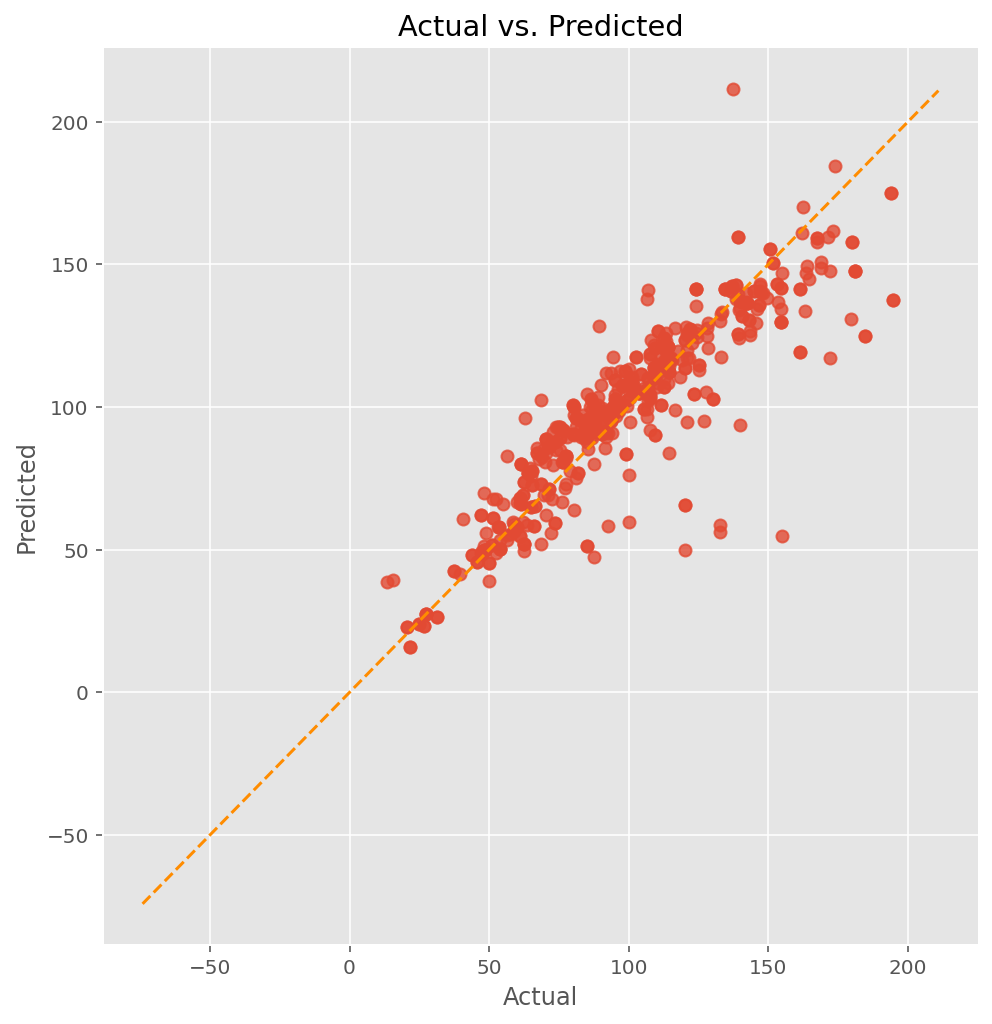

In [76]:
linear_assumption(model4, X_train, y_train)


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


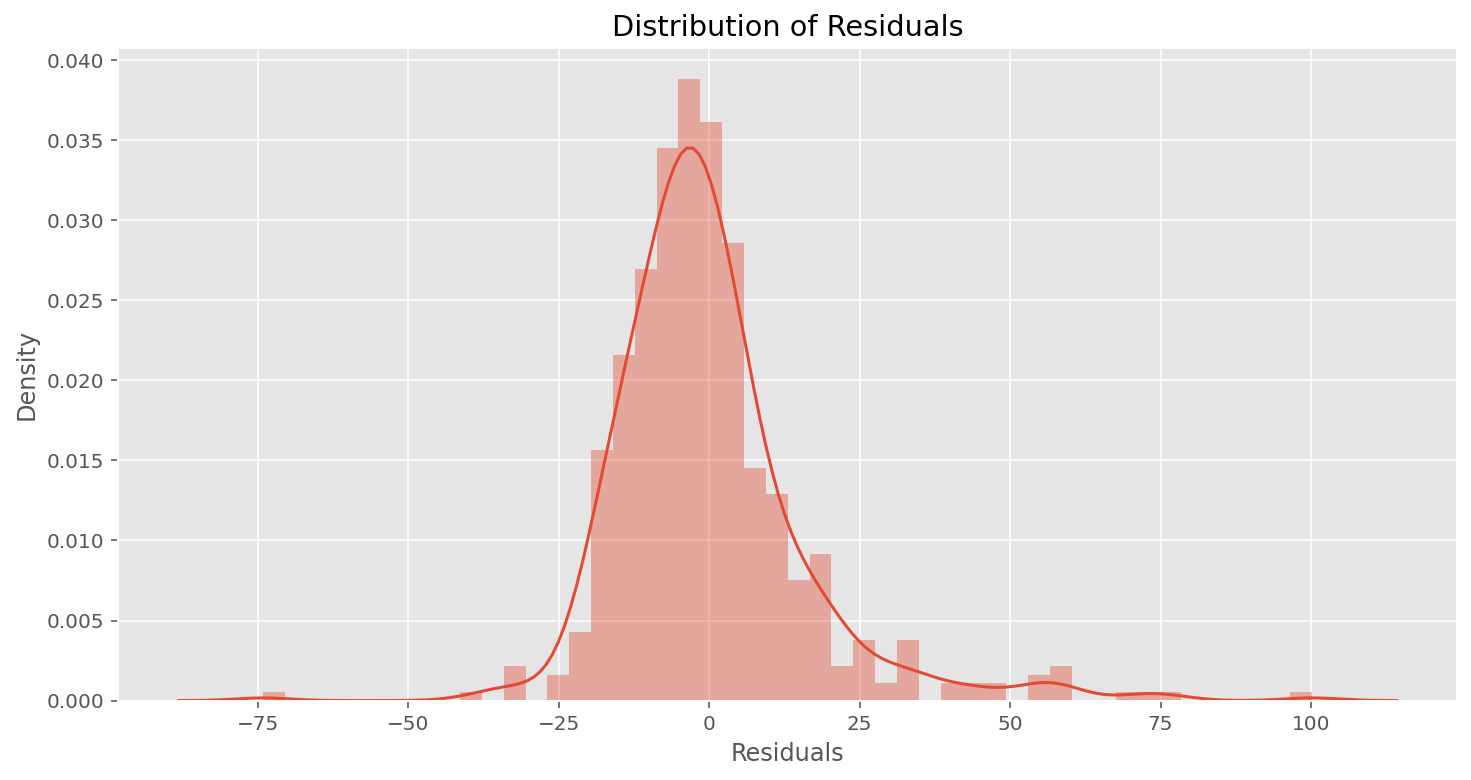


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [77]:
normal_errors_assumption(model4, X_train, y_train)


Assumption 3: Little to no multicollinearity among predictors


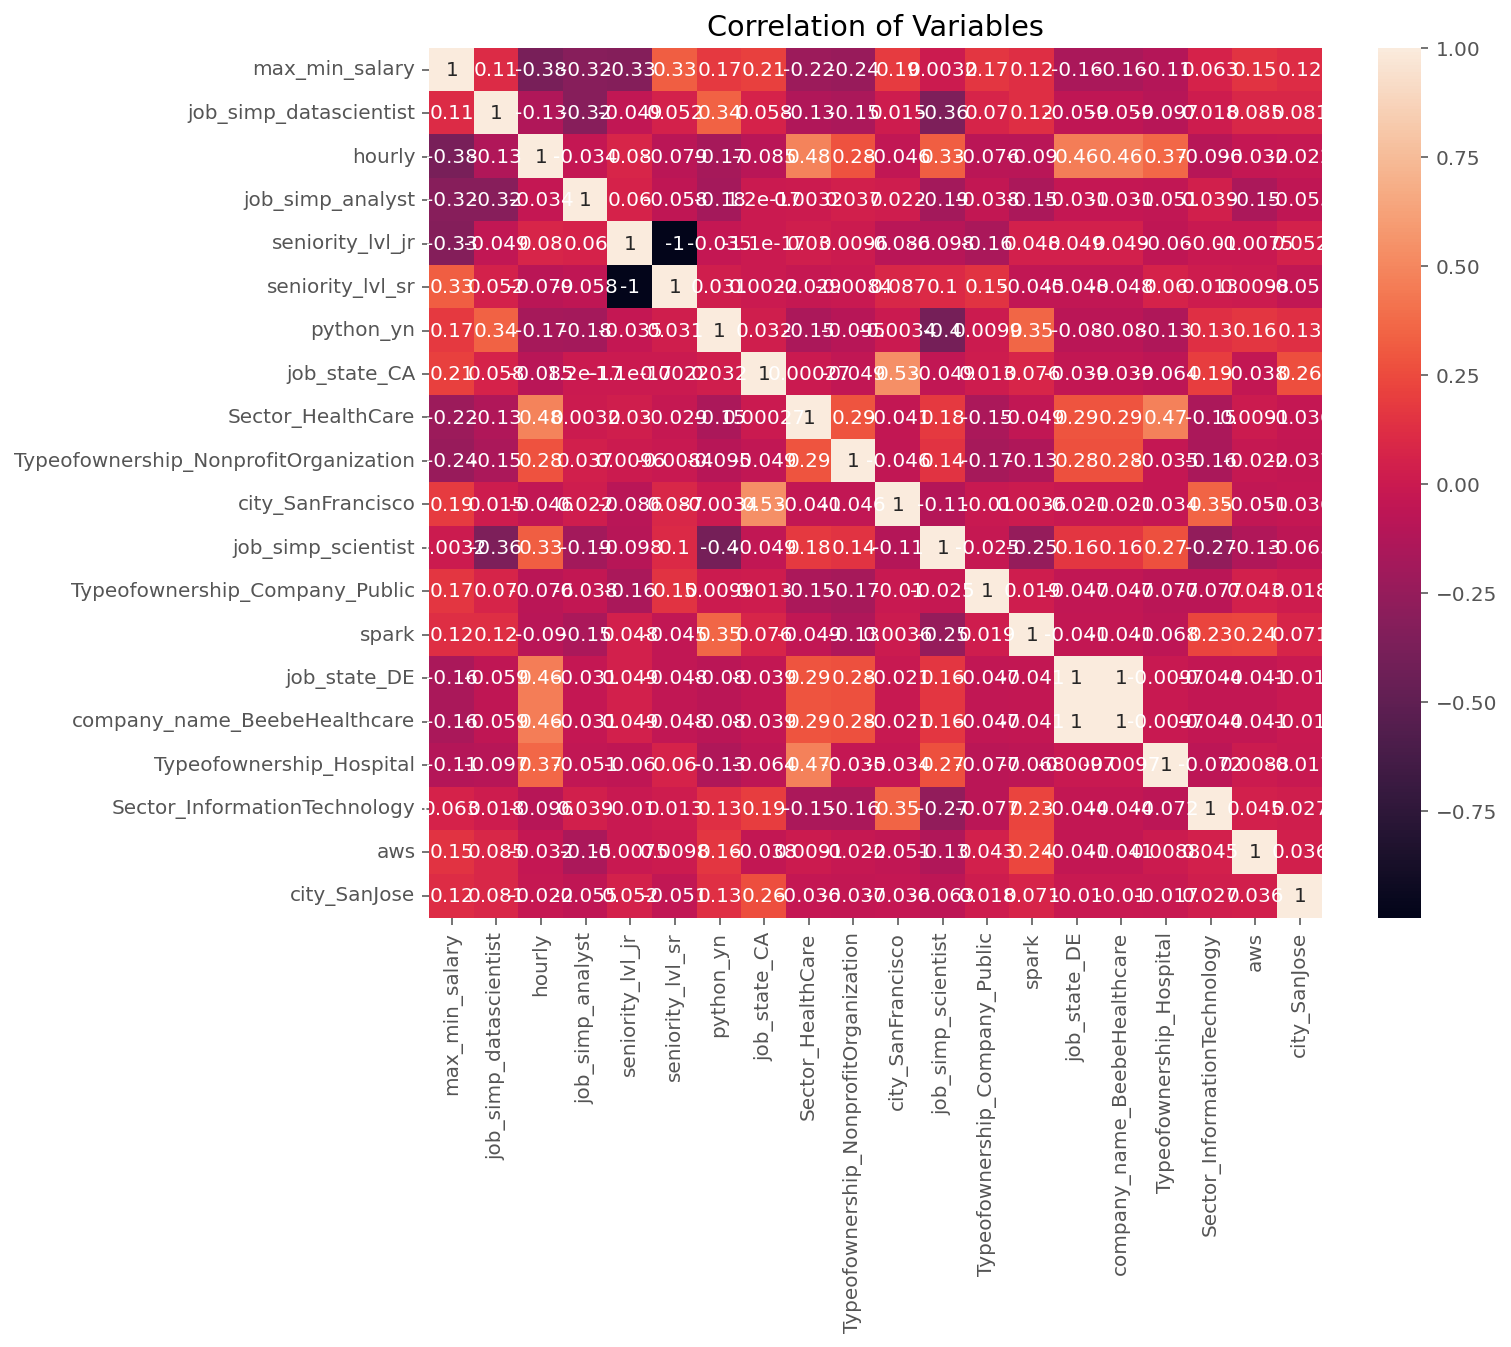

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
max_min_salary: 14.09477365944613
job_simp_datascientist: 2.412630845330982
hourly: 2.042320153864378
job_simp_analyst: 1.7622031781347858
seniority_lvl_jr: 12.808212354264121
seniority_lvl_sr: 7.761533743364046
python_yn: 3.003147622062825
job_state_CA: 2.078153162941165
Sector_HealthCare: 1.8544989660329467
Typeofownership_NonprofitOrganization: 1.4169158560782404
city_SanFrancisco: 1.813015648992445
job_simp_scientist: 2.326438590205214
Typeofownership_Company_Public: 1.510816068555989
spark: 1.6718308102151205
job_state_DE: inf
company_name_BeebeHealthcare: inf
Typeofownership_Hospital: 1.6067411676337484
Sector_InformationTechnology: 1.7668726359377993
aws: 1.4353005652643422
city_SanJose: 1.184721654110443

4 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not sat

In [78]:
multicollinearity_assumption(model4, X_train.values, y_train, list(X.columns))


In [79]:
autocorrelation_assumption(model4, X_train, y_train)


Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9298183050803681
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


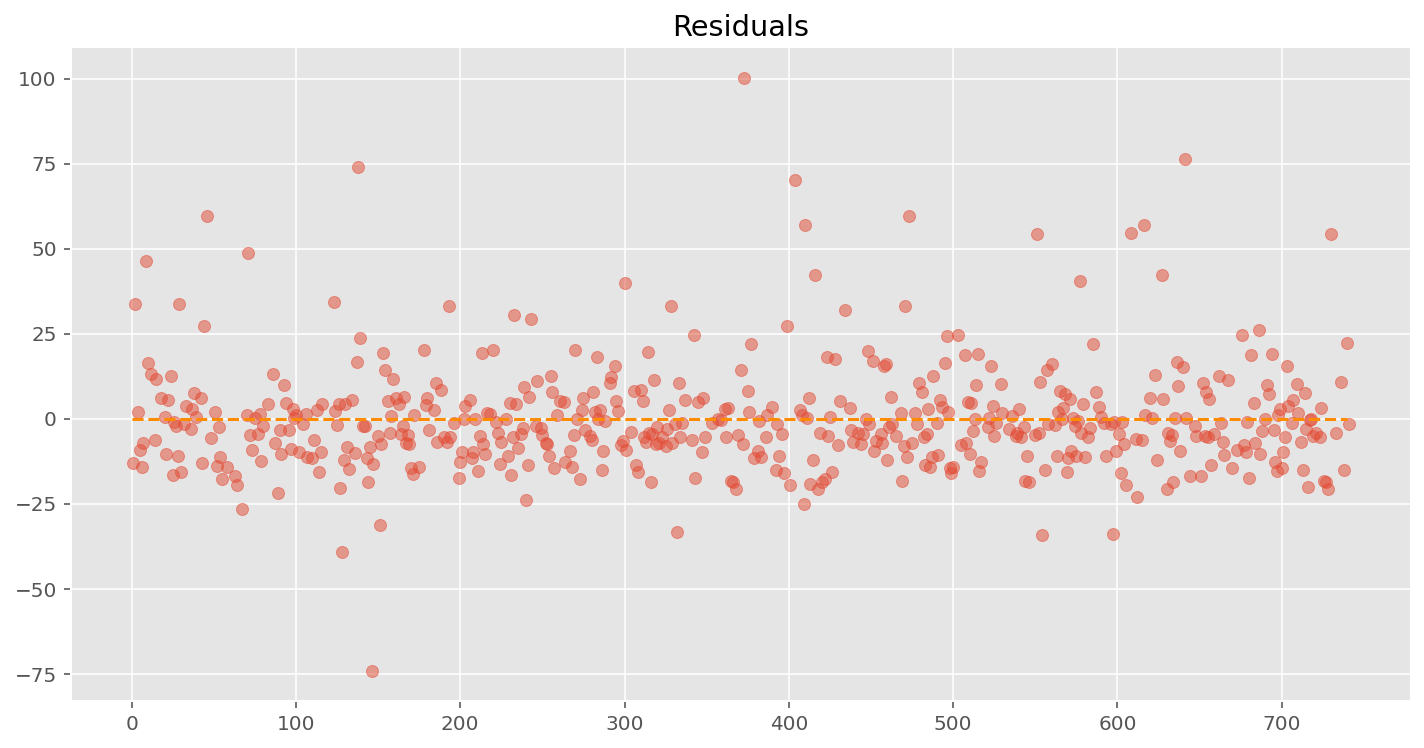

In [80]:
homoscedasticity_assumption(model4, X_train, y_train)

# Regularization

In [81]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

## Model5: Ridge regression 

In [82]:
# alpha=0 is equivalent to linear regression

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
y_pred_train = ridgereg.predict(X_train)
y_pred_test = ridgereg.predict(X_test)

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.7625098496739988
mean_absolute_error : 11.169896361762964
mean_squared_error :  297.8761272724281
root_mean_squared_error :  17.25908825148154


In [83]:
ridgereg.feature_names_in_

array(['max_min_salary', 'job_simp_datascientist', 'hourly',
       'job_simp_analyst', 'seniority_lvl_jr', 'seniority_lvl_sr',
       'python_yn', 'job_state_CA', 'Sector_HealthCare',
       'Typeofownership_NonprofitOrganization', 'city_SanFrancisco',
       'job_simp_scientist', 'Typeofownership_Company_Public', 'spark',
       'job_state_DE', 'company_name_BeebeHealthcare',
       'Typeofownership_Hospital', 'Sector_InformationTechnology', 'aws',
       'city_SanJose'], dtype=object)

In [84]:
result = {
          "Model #": "Model5",
          "Model_Desc": "Ridge regression - alpha 0",
          "Feauters": [ridgereg.feature_names_in_] ,
          "Number of features": len(ridgereg.feature_names_in_),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   
4  Model5                         Ridge regression - alpha 0   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   
4  [max_min_salary, job_simp_datascientist, hourl...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01  
3       0.794786       0.762510  1.623029e+01  1.725909e+01  
4       0.794786       0.762510  1.623029e+01  1.725909e+01

In [85]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
y_pred_train = ridgereg.predict(X_train)
y_pred_test = ridgereg.predict(X_test)

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.772010363122108
mean_absolute_error : 11.56622232083669
mean_squared_error :  285.9599440154058
root_mean_squared_error :  16.910350203807308


In [86]:
result = {
          "Model #": "Model6",
          "Model_Desc": "Ridge regression - alpha 0.1",
          "Feauters": [ridgereg.feature_names_in_] ,
          "Number of features": len(ridgereg.feature_names_in_),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   
4  Model5                         Ridge regression - alpha 0   
5  Model6                       Ridge regression - alpha 0.1   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   
4  [max_min_salary, job_simp_datascientist, hourl...                 20   
5  [max_min_salary, job_simp_datascientist, hourl...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01  
3       0.794786       0.762510  1.623029e+01  1.725909e+01  
4       0.794786       0.762510  1.623029e+01  1.725909e+01  
5       0.789169       0.772010  1.645091e+01  1.691035e+01

In [87]:
# examing the coefficients
print(ridgereg.coef_)

[  1.09990233  14.14477015  -2.8487952  -12.45507788  -5.10441818
   6.01833605   2.48929342   4.69300168  -2.15796896  -5.48974916
   8.68514493  -6.37458703   3.79277931  -0.78573022  -0.48632514
  -0.48632514  -9.96654014   3.70603126   0.61326525   9.14549191]


In [88]:
from array import array


# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range = np.array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_
1.0
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE
y_pred_train = ridgeregcv.predict(X_train)
y_pred_test = ridgeregcv.predict(X_test)

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.7643029390338679
mean_absolute_error : 11.235314014070031
mean_squared_error :  295.6271139401361
root_mean_squared_error :  17.193810338029675


In [89]:
result = {
          "Model #": "Model6",
          "Model_Desc": "Ridge regression - Best Alpha",
          "Feauters": [ridgeregcv.feature_names_in_] ,
          "Number of features": len(ridgeregcv.feature_names_in_),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   
4  Model5                         Ridge regression - alpha 0   
5  Model6                       Ridge regression - alpha 0.1   
6  Model6                      Ridge regression - Best Alpha   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   
4  [max_min_salary, job_simp_datascientist, hourl...                 20   
5  [max_min_salary, job_simp_datascientist, hourl...                 20   
6  [max_min_salary, job_simp_datascientist, hourl...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01  
3       0.794786       0.762510  1.623029e+01  1.725909e+01  
4       0.794786       0.762510  1.623029e+01  1.725909e+01  
5       0.789169       0.772010  1.645091e+01  1.691035e+01  
6       0.794576       0.764303  1.623857e+01  1.719381e+01

# Model6: Lasso Regression

In [90]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.01599096702327997


In [91]:
# examine the coefficients
print(lassoregcv.coef_)

[ 1.26391493 15.94271923  0.         -9.54952898 -0.          8.95430932
  1.24713878  3.54915884 -0.9378607  -2.81362357  7.11465992 -6.37650487
  3.07051538 -0.         -0.         -0.         -7.05023145  3.73766136
 -0.          5.80873182]


In [92]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

# calculate R^2 value, MAE, MSE, RMSE
y_pred_train = lassoregcv.predict(X_train)
y_pred_test = lassoregcv.predict(X_test)

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.7632170559928743
mean_absolute_error : 11.285847149900706
mean_squared_error :  296.9891015193177
root_mean_squared_error :  17.233371739718194


In [93]:
result = {
          "Model #": "Model7",
          "Model_Desc": "Lasso regression - Best Alpha",
          "Feauters": [lassoregcv.feature_names_in_] ,
          "Number of features": len(lassoregcv.feature_names_in_),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   
4  Model5                         Ridge regression - alpha 0   
5  Model6                       Ridge regression - alpha 0.1   
6  Model6                      Ridge regression - Best Alpha   
7  Model7                      Lasso regression - Best Alpha   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   
4  [max_min_salary, job_simp_datascientist, hourl...                 20   
5  [max_min_salary, job_simp_datascientist, hourl...                 20   
6  [max_min_salary, job_simp_datascientist, hourl...                 20   
7  [max_min_salary, job_simp_datascientist, hourl...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE  
0       1.000000       1.000000  4.792161e-14  4.981872e-14  
1       0.828062       0.690978  1.642721e+01  2.057392e+01  
2       0.785863       0.645286  1.833260e+01  2.204254e+01  
3       0.794786       0.762510  1.623029e+01  1.725909e+01  
4       0.794786       0.762510  1.623029e+01  1.725909e+01  
5       0.789169       0.772010  1.645091e+01  1.691035e+01  
6       0.794576       0.764303  1.623857e+01  1.719381e+01  
7       0.793497       0.763217  1.628117e+01  1.723337e+01

# Conclusion:

From all model evaluations we can see best 

In [94]:
def check_underfit(value1, value2):
  if value1- value2 > 0.1:
    return "Overfit"
  elif value1- value2 < -0.1:
    return "Underfit"
  else:
    return "Fit"

In [95]:
model_results['Fit_Check'] = model_results.apply(lambda x: check_underfit(x.Tran_Rsquared, x.Test_Rsquared), axis=1)
model_results

Model #                                         Model_Desc  \
0  Model1                         Top 20 Correlated features   
1  Model2  Top 20 Correlated features - Removed Multicoll...   
2  Model3  Top 10 Correlated features - Removed Multicoll...   
3  Model4      Top 10 features - Removed Outlier from target   
4  Model5                         Ridge regression - alpha 0   
5  Model6                       Ridge regression - alpha 0.1   
6  Model6                      Ridge regression - Best Alpha   
7  Model7                      Lasso regression - Best Alpha   

                                            Feauters Number of features  \
0  Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1  Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2  Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3  Index(['max_min_salary', 'job_simp_datascienti...                 20   
4  [max_min_salary, job_simp_datascientist, hourl...                 20   
5  [max_min_salary, job_simp_datascientist, hourl...                 20   
6  [max_min_salary, job_simp_datascientist, hourl...                 20   
7  [max_min_salary, job_simp_datascientist, hourl...                 20   

   Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE Fit_Check  
0       1.000000       1.000000  4.792161e-14  4.981872e-14       Fit  
1       0.828062       0.690978  1.642721e+01  2.057392e+01   Overfit  
2       0.785863       0.645286  1.833260e+01  2.204254e+01   Overfit  
3       0.794786       0.762510  1.623029e+01  1.725909e+01       Fit  
4       0.794786       0.762510  1.623029e+01  1.725909e+01       Fit  
5       0.789169       0.772010  1.645091e+01  1.691035e+01       Fit  
6       0.794576       0.764303  1.623857e+01  1.719381e+01       Fit  
7       0.793497       0.763217  1.628117e+01  1.723337e+01       Fit

From the submmary table we can say out of all models we created Model2 and Model3 are overfit as train rsquare is higher than test rsquare. 

**Model2** although has the best rsquare for training with 82.8% correct prediction but for unseen i.e. testing data it is only 69% so there is a massive difference hence **overfit**

**Model3** as well training has 78.5% correct value prediction whereas testing is only 64% hence **overfit**

That being said best model from all fit models is **Ridge regression model with alpha 0.1** where train rsquared prediction is 78.9% and testing in 77.2% and hence model performance is reliable on both seen and unseen data.

# Model8: Scaled Transform

In [98]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
data = pd.concat([X,y], axis=1)

 
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()


max_min_salary  job_simp_datascientist  hourly  job_simp_analyst  \
0        0.260563                     1.0     0.0               0.0   
1        0.338028                     1.0     0.0               0.0   
2        0.063380                     1.0     0.0               0.0   
3        0.281690                     1.0     0.0               0.0   
4        0.394366                     1.0     0.0               0.0   

   seniority_lvl_jr  seniority_lvl_sr  python_yn  job_state_CA  \
0               1.0               0.0        1.0           0.0   
1               1.0               0.0        1.0           0.0   
2               1.0               0.0        1.0           0.0   
3               1.0               0.0        1.0           0.0   
4               1.0               0.0        1.0           0.0   

   Sector_HealthCare  Typeofownership_NonprofitOrganization  \
0                0.0                                    0.0   
1                1.0                                    0.0   
2                0.0                                    0.0   
3                0.0                                    0.0   
4                0.0                                    0.0   

   city_SanFrancisco  job_simp_scientist  Typeofownership_Company_Public  \
0                0.0                 0.0                             0.0   
1                0.0                 0.0                             0.0   
2                0.0                 0.0                             0.0   
3                0.0                 0.0                             0.0   
4                0.0                 0.0                             0.0   

   spark  job_state_DE  company_name_BeebeHealthcare  \
0    0.0           0.0                           0.0   
1    0.0           0.0                           0.0   
2    1.0           0.0                           0.0   
3    0.0           0.0                           0.0   
4    0.0           0.0                           0.0   

   Typeofownership_Hospital  Sector_InformationTechnology  aws  city_SanJose  \
0                       0.0                           0.0  0.0           0.0   
1                       0.0                           0.0  0.0           0.0   
2                       0.0                           0.0  0.0           0.0   
3                       0.0                           0.0  0.0           0.0   
4                       0.0                           0.0  0.0           0.0   

   avg_salary  
0    0.323204  
1    0.408840  
2    0.395028  
3    0.348066  
4    0.558011

In [105]:
X = df_scaled.drop(columns=['avg_salary'], axis=1)
y = df_scaled['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)
ridgereg = Ridge(alpha=0.25, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
y_pred_train = ridgereg.predict(X_train)
y_pred_test = ridgereg.predict(X_test)

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
result = {
          "Model #": "Model8",
          "Model_Desc": "Ridge regression - alpha 0.25",
          "Feauters": [ridgereg.feature_names_in_] ,
          "Number of features": len(ridgereg.feature_names_in_),
          "Tran_Rsquared": r2_score(y_train,y_pred_train),
          "Test_Rsquared": r2_score(y_test,y_pred_test),
          "Train_RMSE": np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),
          "Test_RMSE": np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
          }
model_results = model_results.append(pd.DataFrame(result), ignore_index=True)
model_results
 

R-Square Value 0.7692885369480293
mean_absolute_error : 0.06723901230622255
mean_squared_error :  0.008832875722806484
root_mean_squared_error :  0.09398338003501727


Model #                                         Model_Desc  \
0   Model1                         Top 20 Correlated features   
1   Model2  Top 20 Correlated features - Removed Multicoll...   
2   Model3  Top 10 Correlated features - Removed Multicoll...   
3   Model4      Top 10 features - Removed Outlier from target   
4   Model5                         Ridge regression - alpha 0   
5   Model6                       Ridge regression - alpha 0.1   
6   Model6                      Ridge regression - Best Alpha   
7   Model7                      Lasso regression - Best Alpha   
8   Model5                         Ridge regression - alpha 0   
9   Model8                         Ridge regression - alpha 0   
10  Model8                         Ridge regression - alpha 0   
11  Model8                       Ridge regression - alpha 0.1   
12  Model8                      Ridge regression - alpha 0.25   

                                             Feauters Number of features  \
0   Index(['max_salary', 'min_salary', 'job_simp_a...                 20   
1   Index(['max_min_salary', 'job_simp_analyst', '...                 20   
2   Index(['max_min_salary', 'job_simp_analyst', '...                 10   
3   Index(['max_min_salary', 'job_simp_datascienti...                 20   
4   [max_min_salary, job_simp_datascientist, hourl...                 20   
5   [max_min_salary, job_simp_datascientist, hourl...                 20   
6   [max_min_salary, job_simp_datascientist, hourl...                 20   
7   [max_min_salary, job_simp_datascientist, hourl...                 20   
8   [max_min_salary, job_simp_datascientist, hourl...                 20   
9   [max_min_salary, job_simp_datascientist, hourl...                 20   
10  [max_min_salary, job_simp_datascientist, hourl...                 20   
11  [max_min_salary, job_simp_datascientist, hourl...                 20   
12  [max_min_salary, job_simp_datascientist, hourl...                 20   

    Tran_Rsquared  Test_Rsquared    Train_RMSE     Test_RMSE Fit_Check  
0        1.000000       1.000000  4.792161e-14  4.981872e-14       Fit  
1        0.828062       0.690978  1.642721e+01  2.057392e+01   Overfit  
2        0.785863       0.645286  1.833260e+01  2.204254e+01   Overfit  
3        0.794786       0.762510  1.623029e+01  1.725909e+01       Fit  
4        0.794786       0.762510  1.623029e+01  1.725909e+01       Fit  
5        0.789169       0.772010  1.645091e+01  1.691035e+01       Fit  
6        0.794576       0.764303  1.623857e+01  1.719381e+01       Fit  
7        0.793497       0.763217  1.628117e+01  1.723337e+01       Fit  
8        0.794786       0.762510  8.967012e-02  9.535408e-02       NaN  
9        0.794786       0.762510  8.967012e-02  9.535408e-02       NaN  
10       0.789169       0.772010  9.088899e-02  9.342735e-02       NaN  
11       0.789169       0.772010  9.088899e-02  9.342735e-02       NaN  
12       0.772590       0.769289  9.439500e-02  9.398338e-02       NaN